# <center>Trabajo Práctico 2 - Laboratorio de Datos - UBA FCEyN</center>
## <center>Alumnos: Orga Juan Francisco, Romero Santiago, Maspero Lucio Fabrizio</center>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import seaborn.objects as so

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
import itertools


import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module='sklearn')
warnings.filterwarnings("ignore", category=FutureWarning, module='pandas')

In [2]:
print(f'Version usada de sklerarn para el proyecto: {sklearn.__version__}')
print(f'Version usada de pandas para el proyecto: {pd.__version__}')
print(f'Version usada de numpy para el proyecto: {np.__version__}')
print(f'Version usada de seaborn para el proyecto: {sns.__version__}')

Version usada de sklerarn para el proyecto: 1.4.2
Version usada de pandas para el proyecto: 2.2.1
Version usada de numpy para el proyecto: 1.26.4
Version usada de seaborn para el proyecto: 0.13.2


In [3]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

## Preprocesamiento de Datos

Trabajaremos con el dataset FBRef2020-21.csv que contiene datos sobre los principales torneos de clubes y selecciones de futbol del mundo

In [4]:
datos = pd.read_csv('./FBRef2020-21.csv')

Vamos a hacer una visualización general de los datos, para tener una idea de con qué valores, qué datos y qué tipo de datos tenemos.

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Columns: 128 entries, Player to ProgPassReceived/90
dtypes: float64(115), int64(3), object(10)
memory usage: 2.8+ MB


In [6]:
datos.describe()

Age         Born           MP       Starts          Min  \
count  2822.000000  2822.000000  2823.000000  2823.000000  2823.000000   
mean     25.248760  1994.407512    19.273822    14.230252  1277.629118   
std       4.611737     4.620108    11.693210    11.485120   988.140192   
min      14.000000  1977.000000     1.000000     0.000000     1.000000   
25%      22.000000  1991.000000     8.000000     3.000000   333.000000   
50%      25.000000  1995.000000    21.000000    13.000000  1181.000000   
75%      29.000000  1998.000000    30.000000    24.000000  2083.500000   
max      42.000000  2005.000000    38.000000    38.000000  3420.000000   

               90s       Ast/90       npG/90     npG+A/90        xA/90  \
count  2823.000000  2823.000000  2823.000000  2823.000000  2820.000000   
mean     14.195997     0.081034     0.093719     0.174754     0.078897   
std      10.979574     0.231847     0.163769     0.300727     0.147945   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.700000     0.000000     0.000000     0.000000     0.000000   
50%      13.100000     0.000000     0.000000     0.080000     0.050000   
75%      23.150000     0.110000     0.130000     0.260000     0.110000   
max      38.000000     8.180000     2.090000     8.180000     5.690000   

           npxG/90   npxG+xA/90     Shots/90      SoTs/90         SoT%  \
count  2820.000000  2820.000000  2823.000000  2823.000000  2283.000000   
mean      0.112174     0.191089     1.098778     0.346628    30.085151   
std       0.189862     0.256296     1.223941     0.489229    20.535881   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.010000     0.040000     0.240000     0.000000    18.000000   
50%       0.050000     0.120000     0.740000     0.170000    30.800000   
75%       0.160000     0.290000     1.675000     0.530000    41.000000   
max       5.630000     5.690000    20.000000    10.000000   100.000000   

          Gls/Shot      Gls/SoT  AvgShotDist     FKSht/90    npxG/Shot  \
count  2283.000000  1917.000000  2280.000000  2820.000000  2280.000000   
mean      0.083338     0.276369    17.187588     0.037727     0.092417   
std       0.108715     0.263042     5.827674     0.155018     0.058862   
min       0.000000     0.000000     1.400000     0.000000     0.010000   
25%       0.000000     0.000000    13.100000     0.000000     0.050000   
50%       0.060000     0.250000    17.000000     0.000000     0.080000   
75%       0.130000     0.430000    20.900000     0.000000     0.120000   
max       1.000000     1.000000    74.000000     5.000000     0.830000   

           np:G-xG   PassCmp/90   PassAtt/90     PassCmp%  TotDistPass/90  \
count  2820.000000  2820.000000  2820.000000  2806.000000     2820.000000   
mean     -0.015404    34.797220    43.619206    77.781361      669.175461   
std       0.151459    16.836983    17.990966    11.180364      352.791743   
min      -4.000000     0.000000     0.000000     0.000000        0.000000   
25%      -0.040000    22.300000    30.600000    72.200000      401.275000   
50%       0.000000    32.800000    42.200000    78.650000      645.150000   
75%       0.010000    45.000000    55.000000    85.000000      880.100000   
max       1.800000   120.000000   127.500000   100.000000     2810.000000   

       PrgDistPass/90  ShortCmp/90  ShortAtt/90    ShortCmp%    MedCmp/90  \
count     2820.000000  2820.000000  2820.000000  2778.000000  2820.000000   
mean       211.971961    14.393071    16.496819    86.841289    14.793057   
std        140.469030     7.830002     8.369179    10.207824     9.054257   
min          0.000000     0.000000     0.000000     0.000000     0.000000   
25%        100.000000     9.270000    11.300000    82.800000     7.860000   
50%        198.150000    13.500000    15.800000    88.200000    13.400000   
75%        301.325000    18.500000    20.800000    92.200000    20.000000   
max        954.400000    80.000000   

In [7]:
datos.head()

Player  Nation Pos           Squad                Comp   Age  \
0  Patrick van Aanholt  nl NED  DF  Crystal Palace  eng Premier League  29.0   
1     Yunis Abdelhamid  ma MAR  DF           Reims          fr Ligue 1  32.0   
2      Pape Abou Cisse  sn SEN  DF   Saint-Étienne          fr Ligue 1  24.0   
3        David Abraham  ar ARG  DF  Eint Frankfurt       de Bundesliga  34.0   
4     Francesco Acerbi  it ITA  DF           Lazio          it Serie A  32.0   

     Born  MP  Starts   Min   90s  Ast/90  npG/90  npG+A/90  xA/90  npxG/90  \
0  1990.0  22      20  1777  19.7    0.05    0.00      0.05   0.04     0.06   
1  1987.0  33      33  2889  32.1    0.00    0.09      0.09   0.01     0.05   
2  1995.0  14      14  1260  14.0    0.00    0.00      0.00   0.00     0.08   
3  1986.0  14      14  1222  13.6    0.00    0.07      0.07   0.03     0.05   
4  1988.0  32      32  2813  31.3    0.03    0.00      0.03   0.03     0.03   

   npxG+xA/90  Shots/90  SoTs/90  SoT%  Gls/Shot  Gls/SoT  AvgShotDist  \
0        0.10      0.91     0.30  33.3      0.00      0.0         20.3   
1        0.06      0.47     0.16  33.3      0.20      0.6         10.2   
2        0.09      0.93     0.21  23.1      0.00      0.0         11.3   
3        0.08      0.66     0.15  22.2      0.11      0.5         16.0   
4        0.06      0.26     0.00   0.0      0.00      NaN         13.1   

   FKSht/90  npxG/Shot  np:G-xG  PassCmp/90  PassAtt/90  PassCmp%  \
0      0.15       0.07    -0.06        45.1        57.2      78.9   
1      0.00       0.11     0.04        46.9        53.4      87.8   
2      0.00       0.09    -0.09        36.1        44.6      80.9   
3      0.00       0.07     0.02        41.5        50.7      81.9   
4      0.00       0.12    -0.03        57.6        65.0      88.6   

   TotDistPass/90  PrgDistPass/90  ShortCmp/90  ShortAtt/90  ShortCmp%  \
0           756.6           352.5        23.00        26.00       88.7   
1          1049.7           361.9        10.50        11.70       89.1   
2           870.6           313.6         8.93         9.57       93.3   
3           888.0           312.8        13.00        15.00       86.8   
4          1234.2           333.6        17.80        19.30       92.2   

   MedCmp/90  MedAtt/90  MedCmp%  LongCmp/90  LongAtt/90  LongCmp%  \
0       17.3       21.2     81.3        3.96        7.66      51.7   
1       27.8       29.6     93.9        8.32       11.40      73.0   
2       17.3       19.6     88.3        9.43       14.60      64.4   
3       20.4       22.8     89.4        7.79       11.80      65.8   
4       27.7       29.3     94.4       11.00       14.60      75.4   

   KeyPass/90  PassIntoThird/90  PassIntoBox/90  CrossIntoBox/90  ProgPass/90  \
0        0.56              3.45            1.32             0.20         5.69   
1        0.12              2.52            0.03             0.00         2.83   
2        0.21              2.14            0.14             0.00         2.21   
3        0.15              3.68            0.22             0.15         3.16   
4        0.38              3.67            0.64             0.29         3.16   

   LivePassAtt/90  DeadPassAtt/90  FKPassAtt/90  TBCmp/90  PassUnderPress/90  \
0            47.3            9.90          1.83      0.10               5.69   
1            51.6            1.84          1.84      0.00               5.23   
2            42.7            1.86          1.71      0.00               4.79   
3            46.5            4.19          1.25      0.07               5.51   
4            61.6            3.45          1.73      0.03               5.85   

   Switches/90  Crosses/90  GroundPass/90  LowPass/90  HighPass/90  \
0         1.02        1.73           36.4       11.10         9.70   
1         1.21        0.00           42.5        3.86         7.04   
2         3.07        0.07           30.3        3.64        10.60   
3         1.69        0.59           31.8        6.84        12.00   
4         2.33  

Notemos que por la gran cantidad de columnas el metodo "*info()*" no nos muestra, como lo suele hacer, la informacion principal para cada columna. Vamos a explorarla de la siguiente manera:

In [8]:
# Imprimir información de las columnas: nombre, tipo de dato y cantidad de valores nulos
def imprimir_informacion_columnas(df):
    for columna in df.columns:
        nombre_columna = columna
        tipo_dato_columna = df[columna].dtype
        valores_nulos_columna = df[columna].isnull().sum()
        print(f"Columna: {nombre_columna}, Tipo: {tipo_dato_columna}, Valores Nulos: {valores_nulos_columna}")

imprimir_informacion_columnas(datos)

Columna: Player, Tipo: object, Valores Nulos: 0
Columna: Nation, Tipo: object, Valores Nulos: 0
Columna: Pos, Tipo: object, Valores Nulos: 0
Columna: Squad, Tipo: object, Valores Nulos: 0
Columna: Comp, Tipo: object, Valores Nulos: 0
Columna: Age, Tipo: float64, Valores Nulos: 1
Columna: Born, Tipo: float64, Valores Nulos: 1
Columna: MP, Tipo: int64, Valores Nulos: 0
Columna: Starts, Tipo: int64, Valores Nulos: 0
Columna: Min, Tipo: int64, Valores Nulos: 0
Columna: 90s, Tipo: float64, Valores Nulos: 0
Columna: Ast/90, Tipo: float64, Valores Nulos: 0
Columna: npG/90, Tipo: float64, Valores Nulos: 0
Columna: npG+A/90, Tipo: float64, Valores Nulos: 0
Columna: xA/90, Tipo: float64, Valores Nulos: 3
Columna: npxG/90, Tipo: float64, Valores Nulos: 3
Columna: npxG+xA/90, Tipo: float64, Valores Nulos: 3
Columna: Shots/90, Tipo: float64, Valores Nulos: 0
Columna: SoTs/90, Tipo: float64, Valores Nulos: 0
Columna: SoT%, Tipo: float64, Valores Nulos: 540
Columna: Gls/Shot, Tipo: float64, Valores N

Comenzaremos el filtrado de datos con la eliminación de datos de jugadores que jugaron menos de 500 minutos en la temporada (columna Min). Seguido de esto, eliminamos los datos de columnas con más de 100 datos faltantes y luego las filas con datos faltnates.

In [9]:
# Eliminamos a los jugadores que jugaron menos de 500 minutos en la temporada
datos = datos[datos['Min'] >= 500]

# Eliminamos las columnas con más de 100 datos faltantes
datos = datos.dropna(thresh=len(datos) - 100, axis=1)

# Eliminamos las filas con datos faltantes
datos = datos.dropna()

Hecho esto, vamos a resetear los índices y quedarnos únicamente con las variables numéricas teniendo como resultado nuestro dataframe *data_num*

In [10]:
# Reseteamos los índices
datos.reset_index(drop=True, inplace=True)

# Definimos el DataFrame 'data_num' que solo contenga las variables numéricas a partir de la columna Ast/90
columnas_numericas = datos.select_dtypes(include=['number']).columns
indice_inicio = columnas_numericas.get_loc('Ast/90')
data_num = datos[columnas_numericas[indice_inicio:]]

Continuamos haciendo una revisión de datos de nuestro nuevo dataframe

In [11]:
data_num.head()

Ast/90  npG/90  npG+A/90  xA/90  npxG/90  npxG+xA/90  Shots/90  SoTs/90  \
0    0.05    0.00      0.05   0.04     0.06        0.10      0.91     0.30   
1    0.00    0.09      0.09   0.01     0.05        0.06      0.47     0.16   
2    0.00    0.00      0.00   0.00     0.08        0.09      0.93     0.21   
3    0.00    0.07      0.07   0.03     0.05        0.08      0.66     0.15   
4    0.03    0.00      0.03   0.03     0.03        0.06      0.26     0.00   

   FKSht/90  np:G-xG  PassCmp/90  PassAtt/90  PassCmp%  TotDistPass/90  \
0      0.15    -0.06        45.1        57.2      78.9           756.6   
1      0.00     0.04        46.9        53.4      87.8          1049.7   
2      0.00    -0.09        36.1        44.6      80.9           870.6   
3      0.00     0.02        41.5        50.7      81.9           888.0   
4      0.00    -0.03        57.6        65.0      88.6          1234.2   

   PrgDistPass/90  ShortCmp/90  ShortAtt/90  ShortCmp%  MedCmp/90  MedAtt/90  \
0           352.5        23.00        26.00       88.7       17.3       21.2   
1           361.9        10.50        11.70       89.1       27.8       29.6   
2           313.6         8.93         9.57       93.3       17.3       19.6   
3           312.8        13.00        15.00       86.8       20.4       22.8   
4           333.6        17.80        19.30       92.2       27.7       29.3   

   MedCmp%  LongCmp/90  LongAtt/90  LongCmp%  KeyPass/90  PassIntoThird/90  \
0     81.3        3.96        7.66      51.7        0.56              3.45   
1     93.9        8.32       11.40      73.0        0.12              2.52   
2     88.3        9.43       14.60      64.4        0.21              2.14   
3     89.4        7.79       11.80      65.8        0.15              3.68   
4     94.4       11.00       14.60      75.4        0.38              3.67   

   PassIntoBox/90  CrossIntoBox/90  ProgPass/90  LivePassAtt/90  \
0            1.32             0.20         5.69            47.3   
1            0.03             0.00         2.83            51.6   
2            0.14             0.00         2.21            42.7   
3            0.22             0.15         3.16            46.5   
4            0.64             0.29         3.16            61.6   

   DeadPassAtt/90  FKPassAtt/90  TBCmp/90  PassUnderPress/90  Switches/90  \
0            9.90          1.83      0.10               5.69         1.02   
1            1.84          1.84      0.00               5.23         1.21   
2            1.86          1.71      0.00               4.79         3.07   
3            4.19          1.25      0.07               5.51         1.69   
4            3.45          1.73      0.03               5.85         2.33   

   Crosses/90  GroundPass/90  LowPass/90  HighPass/90  LeftPass/90  \
0        1.73           36.4       11.10         9.70         37.7   
1        0.00           42.5        3.86         7.04         35.4   
2        0.07           30.3        3.64        10.60         13.6   
3        0.59           31.8        6.84        12.00          5.0   
4        0.83           46.9        6.65        11.50         49.1   

   RightPass/90  HeadPass/90  ThrowPass/90  OtherPartPass/90  OffsidePass/90  \
0          9.85         1.27          7.97              0.15            0.61   
1         14.80         1.78          0.00              0.09            0.12   
2         27.60         2.14          0.14              0.00            0.00   
3         36.80         3.97          2.94              0.07            0.22   
4         10.80         2.94          0.77              0.16            0.13   

   OutOBPass/90  PassesInt/90  PassesBlk/90  SCA/90  PassLiveSCA/90  \
0          1.12          1.47          1.73    1.32            1.12   
1          0.81          0.75          0.40    0.34            0.31   
2          1.07          0.36          0.21    0.50            0.29   
3          0.51          0.37          0.74    0.15            0.15   
4          0.86 

In [12]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Columns: 106 entries, Ast/90 to ProgPassReceived/90
dtypes: float64(106)
memory usage: 1.5 MB


In [13]:
imprimir_informacion_columnas(data_num)

Columna: Ast/90, Tipo: float64, Valores Nulos: 0
Columna: npG/90, Tipo: float64, Valores Nulos: 0
Columna: npG+A/90, Tipo: float64, Valores Nulos: 0
Columna: xA/90, Tipo: float64, Valores Nulos: 0
Columna: npxG/90, Tipo: float64, Valores Nulos: 0
Columna: npxG+xA/90, Tipo: float64, Valores Nulos: 0
Columna: Shots/90, Tipo: float64, Valores Nulos: 0
Columna: SoTs/90, Tipo: float64, Valores Nulos: 0
Columna: FKSht/90, Tipo: float64, Valores Nulos: 0
Columna: np:G-xG, Tipo: float64, Valores Nulos: 0
Columna: PassCmp/90, Tipo: float64, Valores Nulos: 0
Columna: PassAtt/90, Tipo: float64, Valores Nulos: 0
Columna: PassCmp%, Tipo: float64, Valores Nulos: 0
Columna: TotDistPass/90, Tipo: float64, Valores Nulos: 0
Columna: PrgDistPass/90, Tipo: float64, Valores Nulos: 0
Columna: ShortCmp/90, Tipo: float64, Valores Nulos: 0
Columna: ShortAtt/90, Tipo: float64, Valores Nulos: 0
Columna: ShortCmp%, Tipo: float64, Valores Nulos: 0
Columna: MedCmp/90, Tipo: float64, Valores Nulos: 0
Columna: MedAtt

## Clustering

#### Nuestro primer objetivo es realizar algun agrupamiento de jugadores con caracterısticas similares.

*(6.a) Seleccionar dos variables cualesquiera de los datos y realizar un grafico de dispersion de una variable en funcion de la otra para el total de las observaciones.*

 *- ¿Pueden encontrar facilmente grupos distintos?*

Consideramos interesante ver la relacion entre los goles convertidos y esperados para cada jugador. Con esto, podríamos darnos una idea de los jugadores que estan cumpliendo con las expectativas de goles puestas en ellos, y ver así quienes no la estan cumpliendo, también podremos analizar quienes estan teniendo un rendimiento mayor al esperado.

Comencemos visualizando los datos:

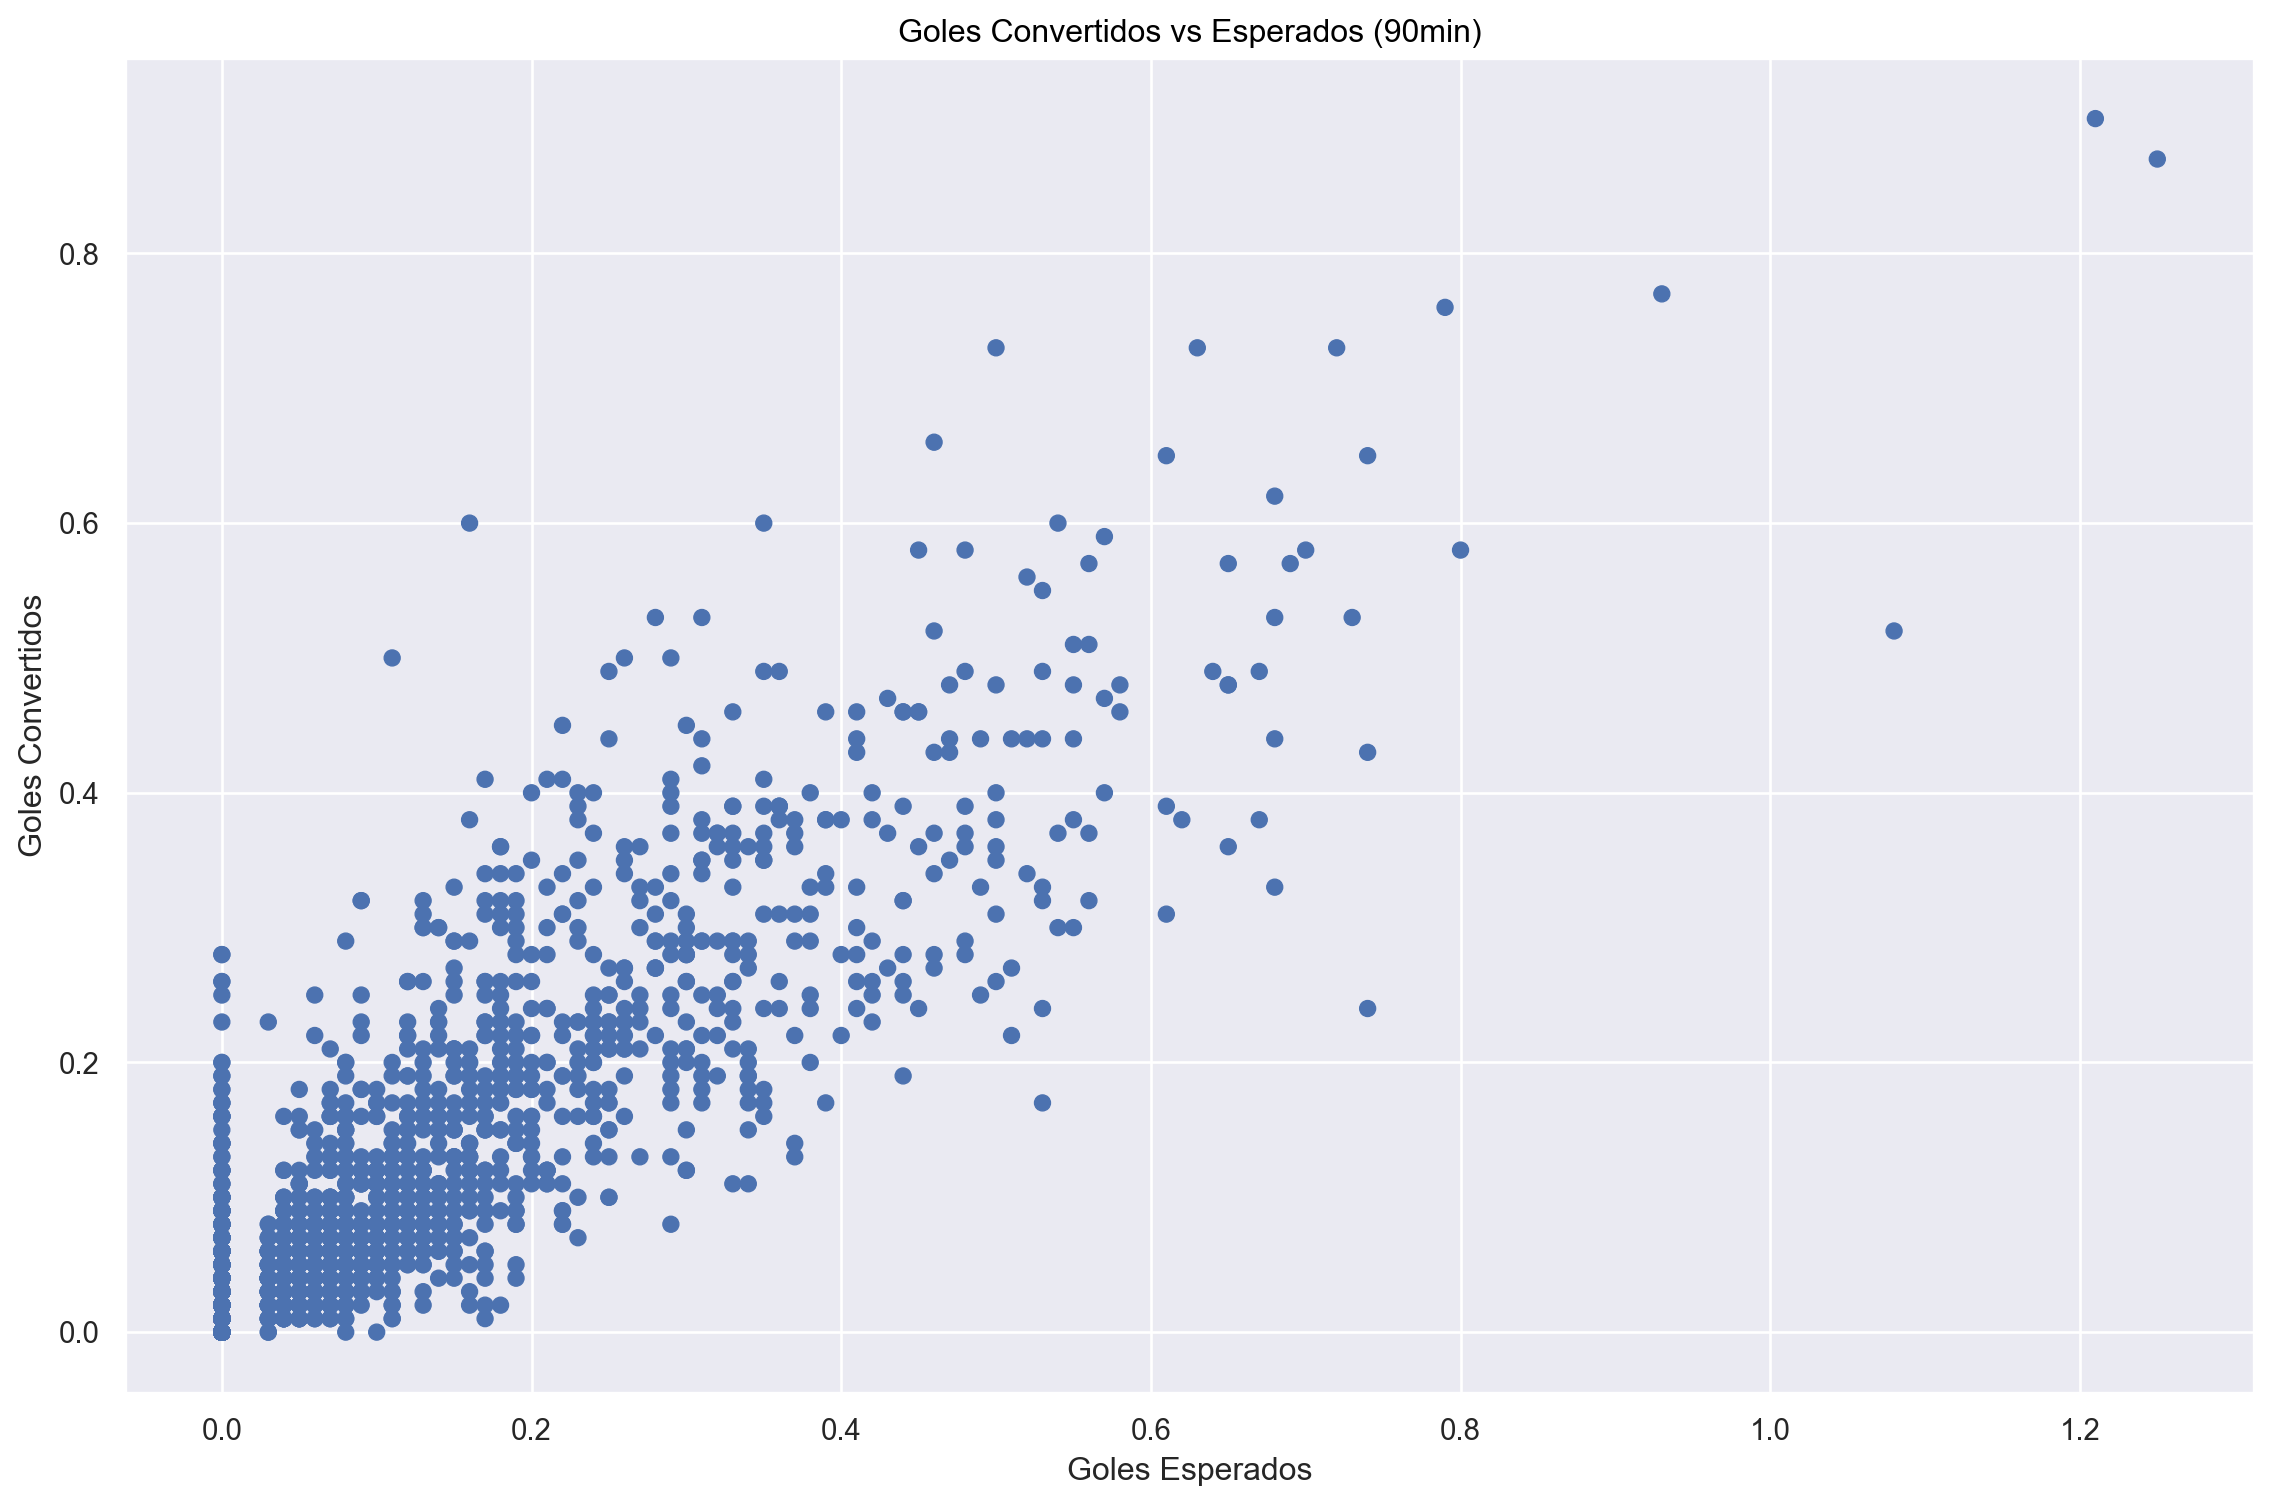

In [14]:
(
  so.Plot(data=data_num, x='npG/90', y='npxG/90')
  .layout(size=(12,8))
  .add(so.Dot())
  .label(
      x='Goles Esperados', y='Goles Convertidos',
      title='Goles Convertidos vs Esperados (90min)'
    )
)

Podemos notar que no es un trabajo sencillo encontrar distintos grupos para la distribucion de los jugadores con respecto a estas varibles.

*(b) Escalar los datos y realizar un analisis de componentes principales, quedandose solo con las dos primeras componentes. Realizar un grafico como el del punto anterior.*

*- ¿Cuantos clusters puede distinguir en el grafico?*
*- ¿A que caracterısticas de los jugadores pueden corresponder los clusters?*
*- ¿Como pueden verificar su conjetura?*

Busquemos ahora los componentes mas representativos de los datos y hagamos nuevamente el analisis hecho recientemente.

In [15]:
# Escalar los datos numéricos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Realizar el análisis de componentes principales (PCA)
pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(data_scaled) # Devuelve los valores transformados de los 'n' componentes transformados
print(componentes_principales.shape)

(1902, 2)


In [16]:
componentes_principales

array([[-2.91448921,  2.25129977],
       [-6.81841064, -1.41378946],
       [-6.47428099, -3.79253434],
       ...,
       [ 6.80094942,  1.47030388],
       [ 6.84863946, -0.87812122],
       [ 2.45963356,  2.03690652]])

Podemos observar los valores de los componentes principales despues de ser transformados y la dimension de los mismos, notemos como mantuvimos la cantidad de filas pero ahora unicamente con nuestras 2 variables mas 'representativas'. Veamos ahora la informacion mas importante de estas.

In [17]:
# Varianza explicada por cada componente principal
varianza_explicada = pca.explained_variance_

# Proporción de varianza explicada por cada componente principal
prop_varianza_explicada = pca.explained_variance_ratio_ #OBS: explained_variance_ratio_ = explained_variance_ / np.sum(explained_variance_)

# Varianza acumulada explicada
varianza_acumulada = np.cumsum(prop_varianza_explicada)

print("Varianza explicada por cada componente principal:", varianza_explicada)
print("Proporción de varianza explicada por cada componente:", prop_varianza_explicada)
print("Varianza acumulada explicada:", varianza_acumulada)

Varianza explicada por cada componente principal: [29.40272413 21.87234121]
Proporción de varianza explicada por cada componente: [0.27723835 0.20623435]
Varianza acumulada explicada: [0.27723835 0.48347271]


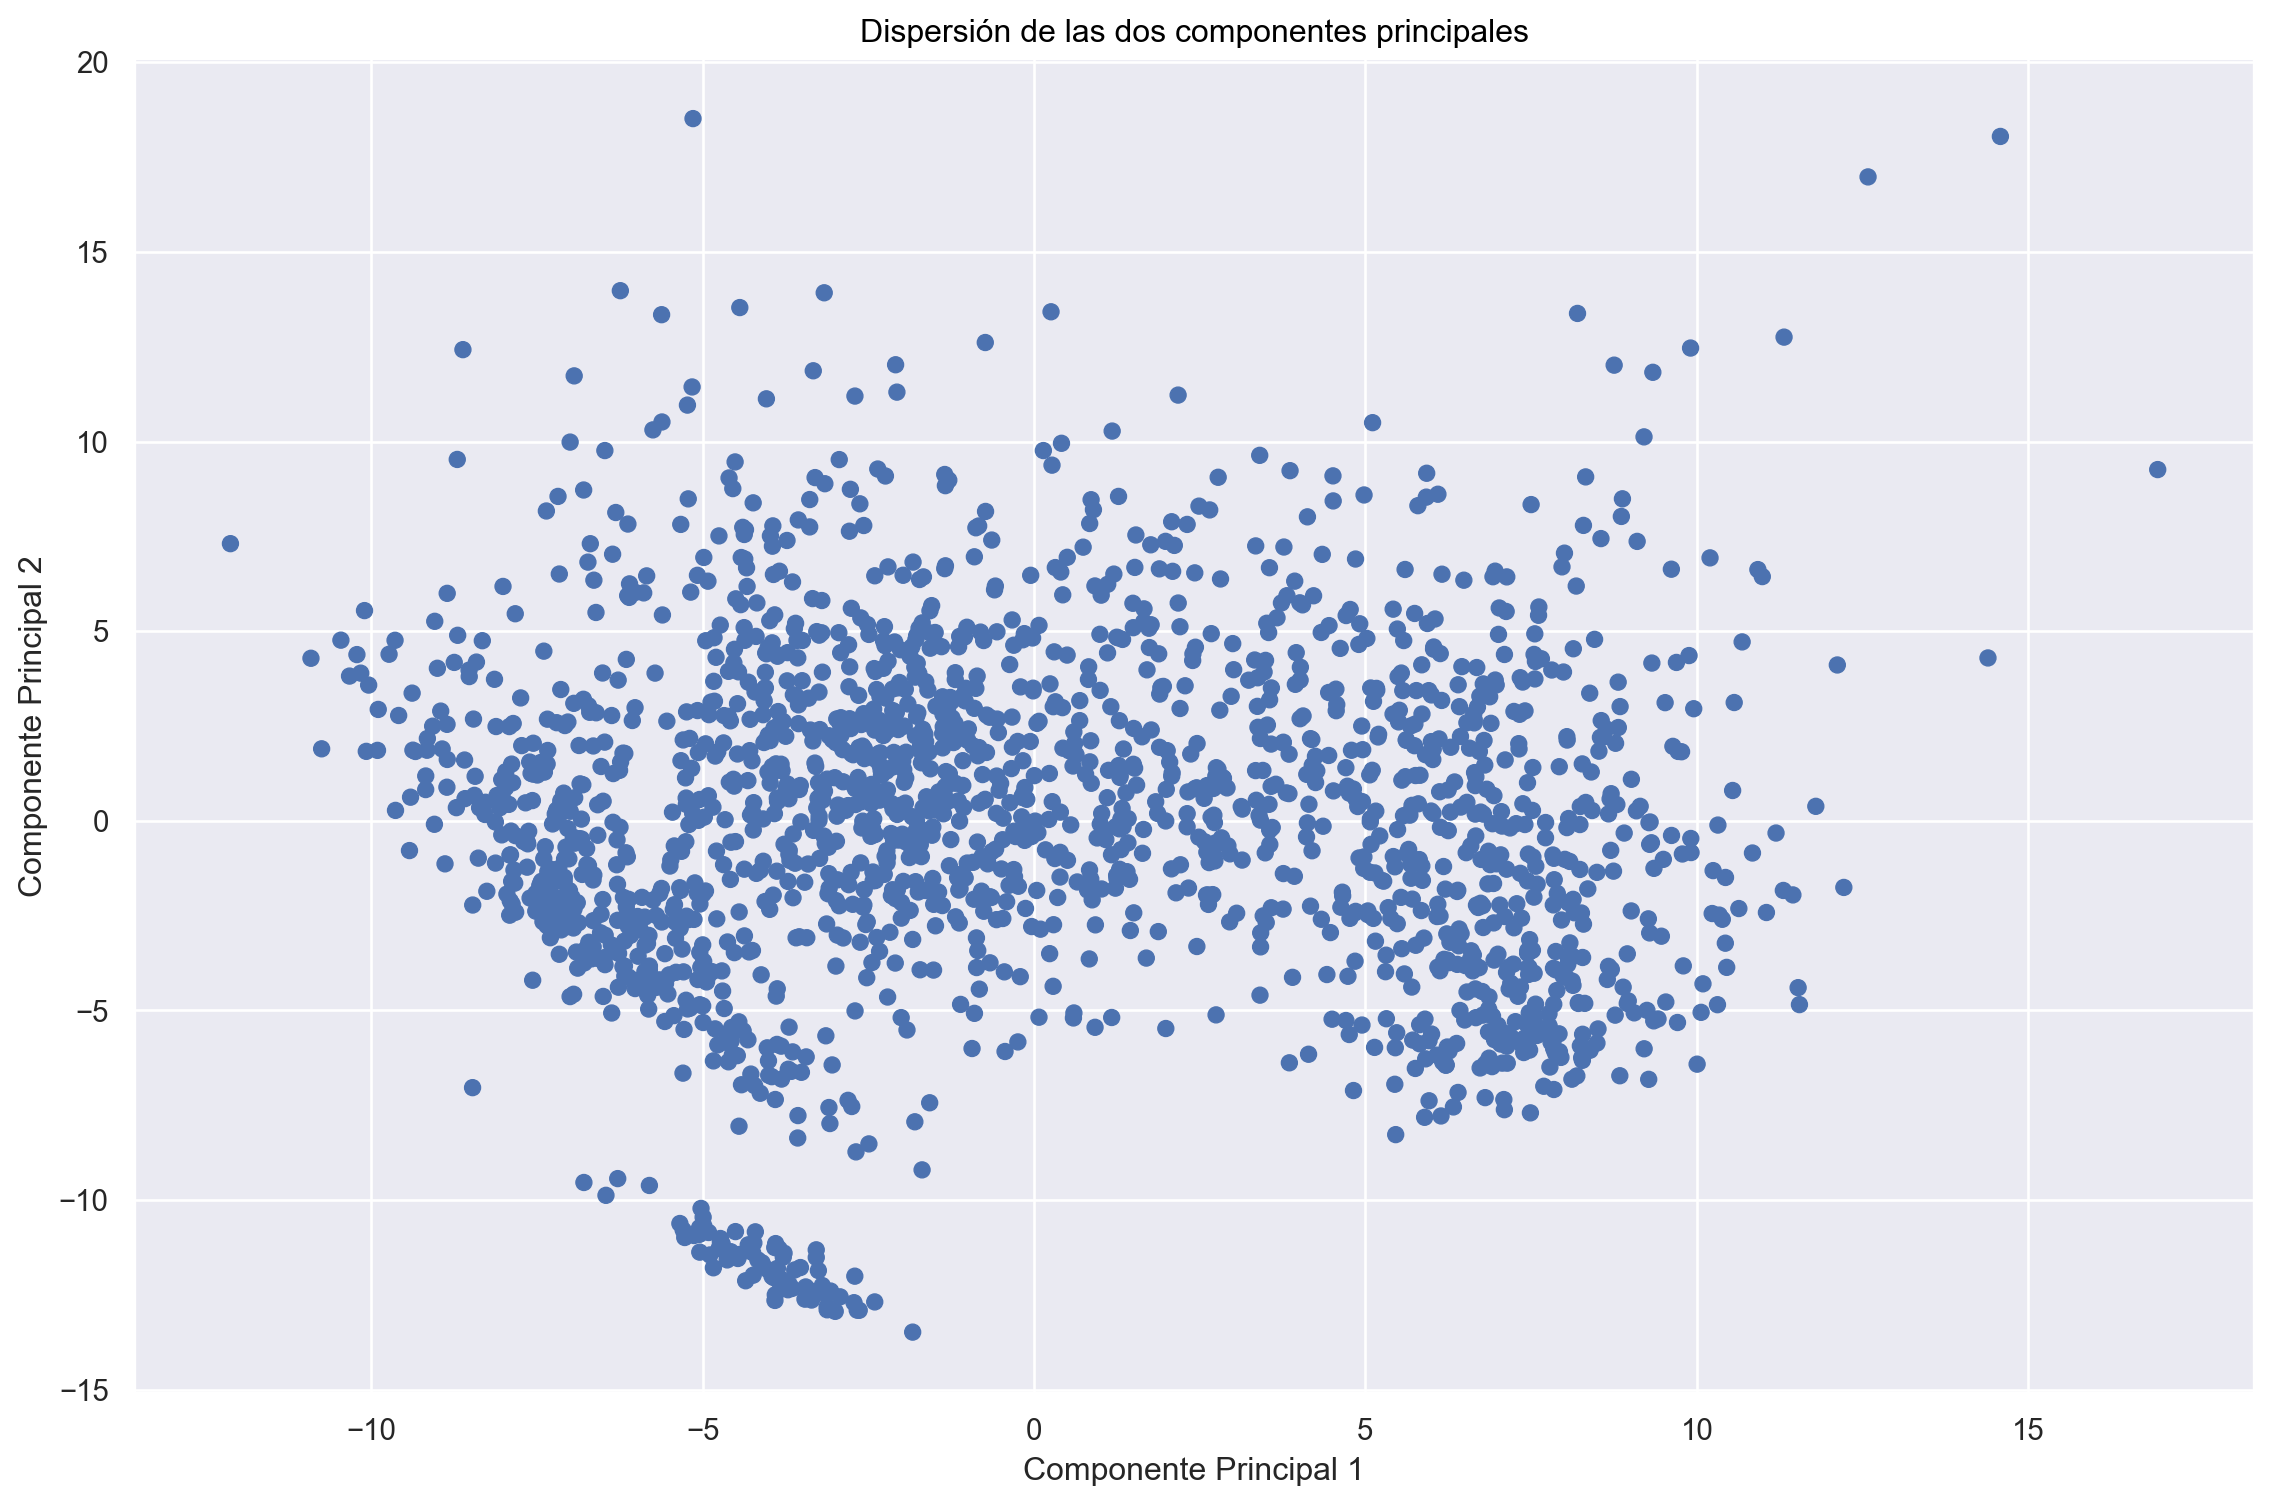

In [18]:
# Gráfico de dispersión de las dos primeras componentes principales
(
  so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1]) #pca_df, x='Componente Principal 1', y='Componente Principal 2')
  .layout(size=(12,8))
  .add(so.Dot())
  .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='Dispersión de las dos componentes principales'
    )
)


*- ¿Cuantos clusters puede distinguir en el grafico?*

Realmente, viendolo a ojo es claro que K-means no es el algoritmo ideal para este tipo de distribucion de los datos, y en consecuencia de esto tampoco es facil distinguir claramente distintos clusters. Recordemos que uno de las características, tal vez la mas importante para tener en ceunta y que no falle el algoritmo, es que los clusters son esfericos e isotropicos, lo cual visualizando los datos no se distingue una buena dispocición de los datos para esto.

Teniendo en cuenta esto, vamos a reflejar graficamente algunos posibles centros para los distintos clusters, personalmente creemos que pueden llegar a ser 4.

In [19]:
hipoteticos_centros = np.array([[-3.75, -12], [-7, -2.5], [-2, 2.5], [7,0]])

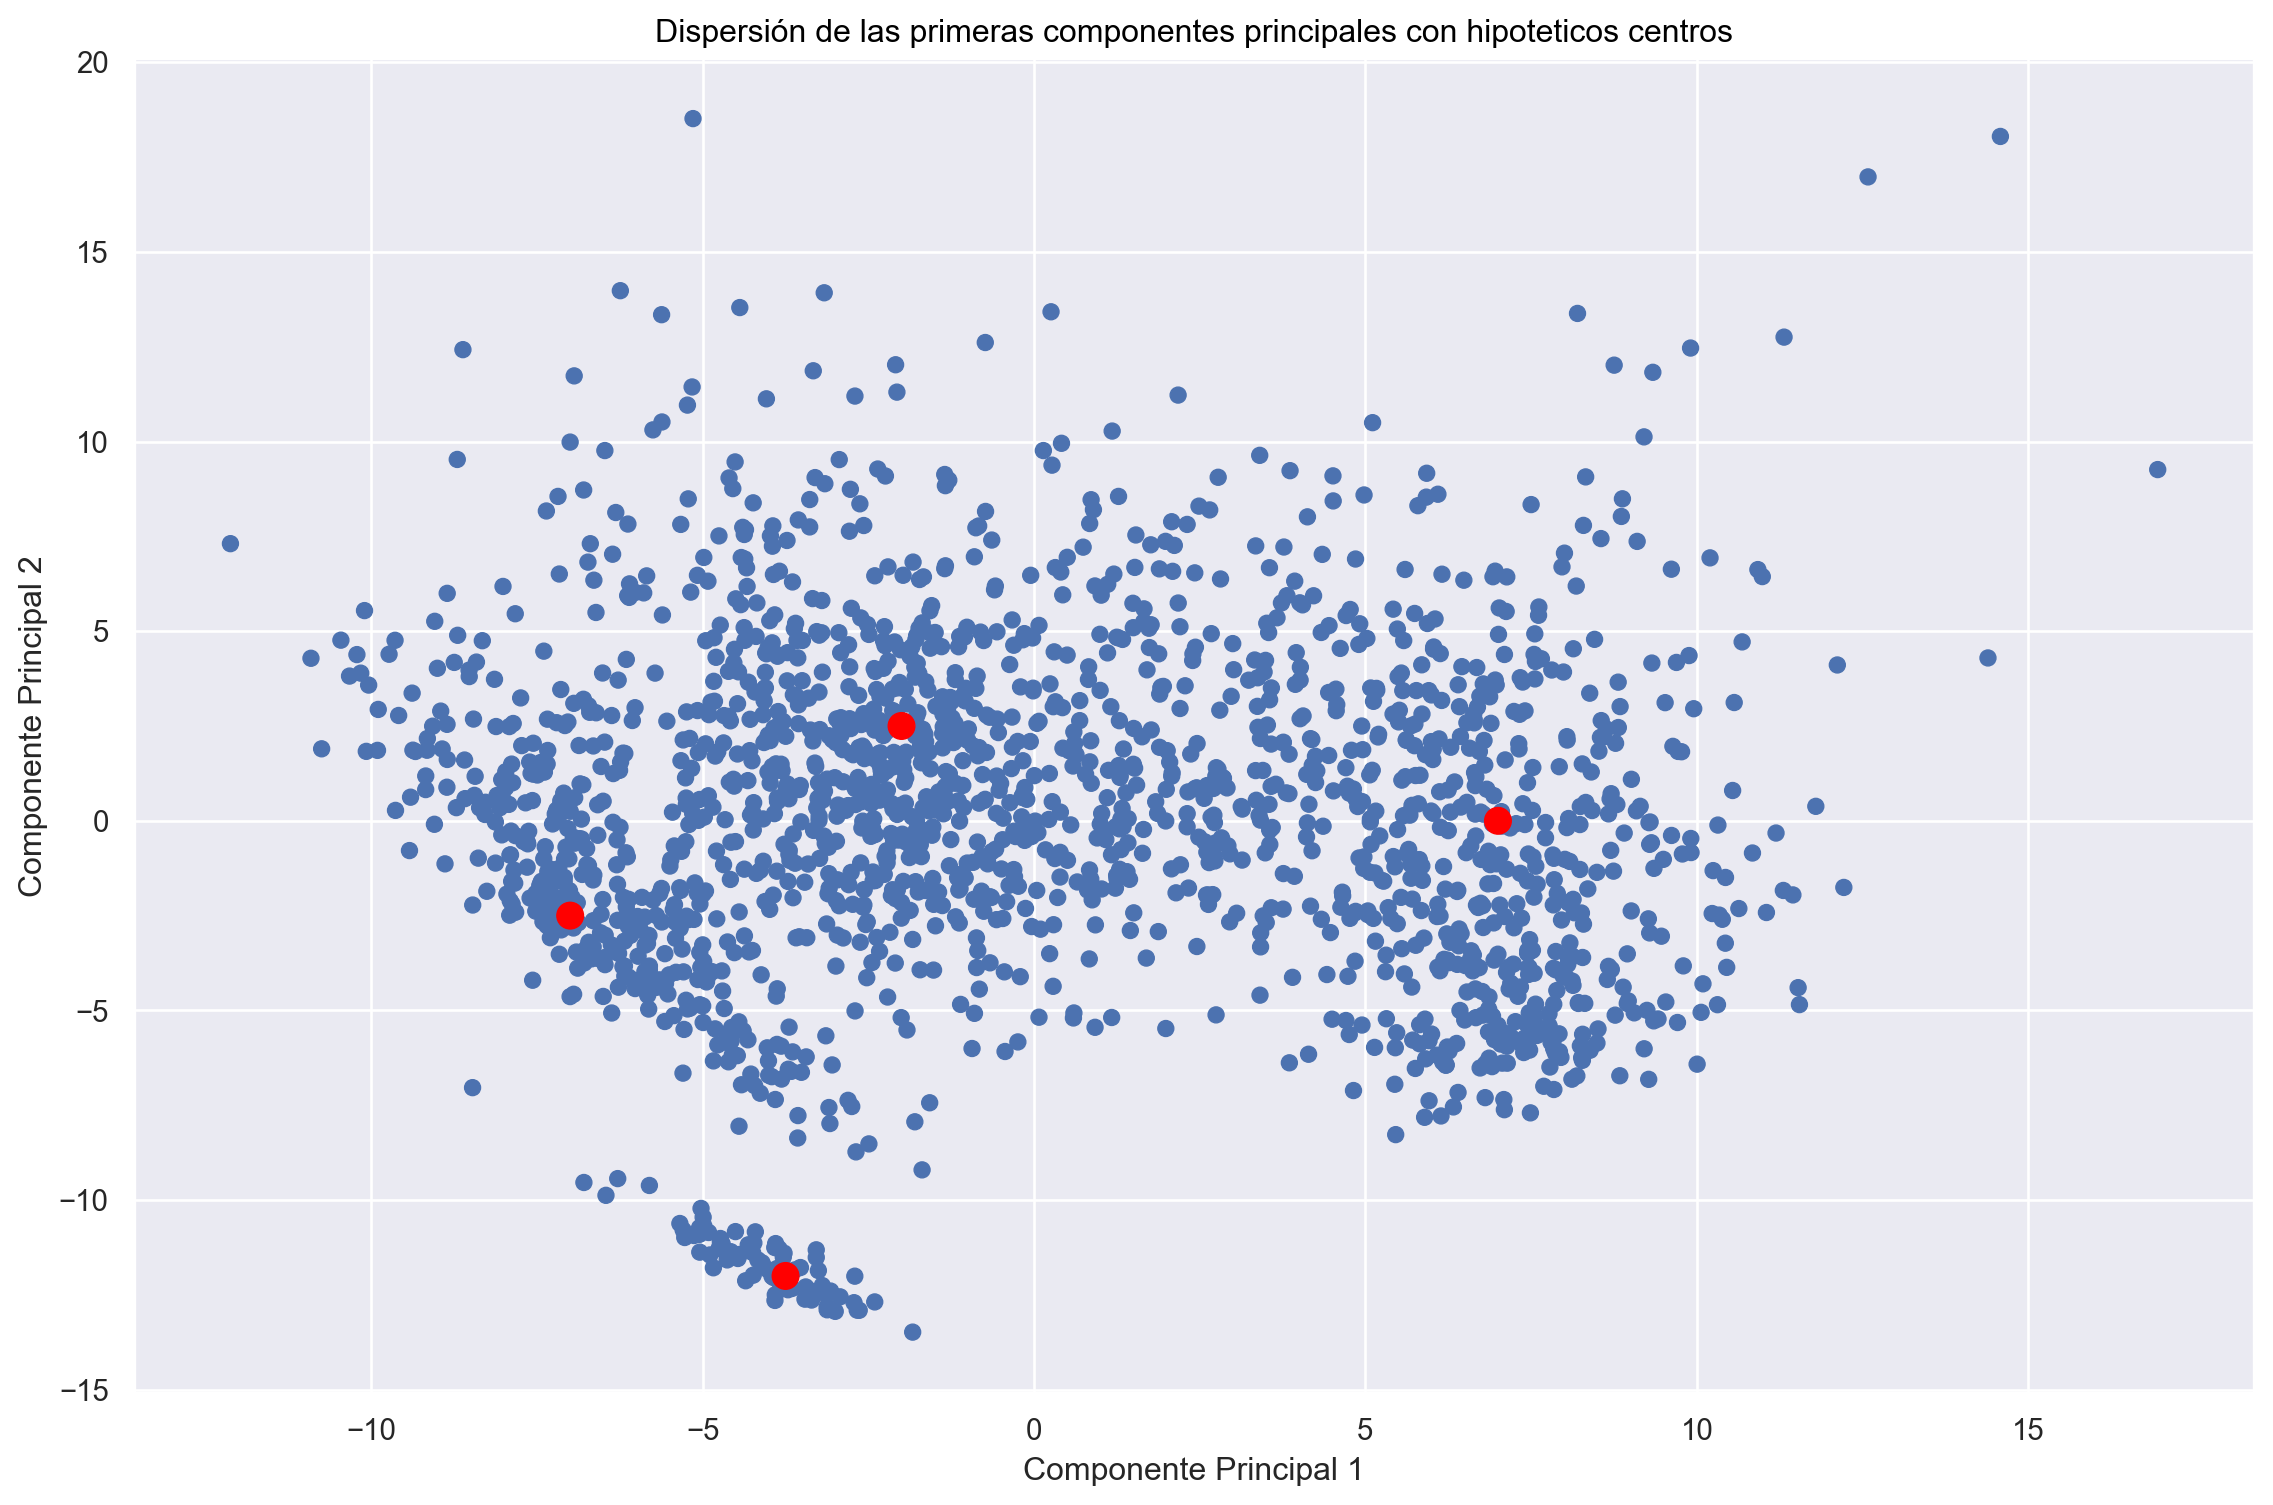

In [20]:
(
  so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
  .layout(size=(12,8))
  .add(so.Dot())
  .add(so.Dot(color = "red", pointsize= 10), x = hipoteticos_centros[:,0], y = hipoteticos_centros[:,1])
  .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='Dispersión de las primeras componentes principales con hipoteticos centros'
    )
)

*- ¿A que caracterısticas de los jugadores pueden corresponder los clusters?*

Esto se puede ver con un analisis de la influencia de cada variable original para cada componente, ya que estas corresponden justamente a las distintas caracteristicas de los jugaadores.

In [21]:
# Crear el DataFrame original
pca_influencias = pd.DataFrame(data=pca.components_.T, columns=['Componente Principal 1', 'Componente Principal 2'], index=data_num.columns)

# Extraer los 10 valores máximos para cada componente principal
max_10_pc1 = pca_influencias['Componente Principal 1'].nlargest(10)
max_10_pc2 = pca_influencias['Componente Principal 2'].nlargest(10)

# Crear DataFrames con los 10 valores máximos
df_max_10_pc1 = pd.DataFrame(max_10_pc1)
df_max_10_pc2 = pd.DataFrame(max_10_pc2)

# Mostrar los DataFrames
display(df_max_10_pc1)
display(df_max_10_pc2)


Componente Principal 1
ProgPassReceived/90                0.167968
Miscontrol/90                      0.160085
Att PenTchs/90                     0.159957
Att 3rdPress/90                    0.158074
npxG+xA/90                         0.155862
Shots/90                           0.151770
SoTs/90                            0.149002
npxG/90                            0.144932
Dispossessed/90                    0.144000
npG+A/90                           0.139555

Componente Principal 2
ProgPass/90                      0.183096
ShortAtt/90                      0.182445
Carries/90                       0.180202
ShortCmp/90                      0.177666
PassesReceived/90                0.173631
ProgCarry/90                     0.172332
Mid 3rdTchs/90                   0.168084
PassTarget/90                    0.165025
LiveTchs/90                      0.164377
Touches/90                       0.163771

*- ¿Como pueden verificar su conjetura?*

Una buena manera es ir a los hechos, entrenar un K-means con 4 clusters y ver cuales son efectivamente los centros de los mismos y compararlos visualmente con los observados *'a ojo'*.

*(c) Para la cantidad de clusters observados en el ıtem anterior, realizar un agrupamiento por k-medias, y colorear los puntos segun las etiquetas obtenidas.*

*- ¿Coinciden las etiquetas con lo esperado?*

Comencemos encontrando los mejores centros con el método Kmeans

In [22]:
kmeans = KMeans(n_clusters=4)
etiquetas = kmeans.fit_predict(componentes_principales)
print(f'Los mejores centros para 4 clusters: {kmeans.cluster_centers_}')

Los mejores centros para 4 clusters: [[-4.34358089 -4.80806912]
 [ 4.52638656  3.66411856]
 [-3.80110604  2.83740437]
 [ 6.69761399 -3.10966185]]


Procedemos a graficar los datos con los centros hipotéticos y los nuevos mejores centros:

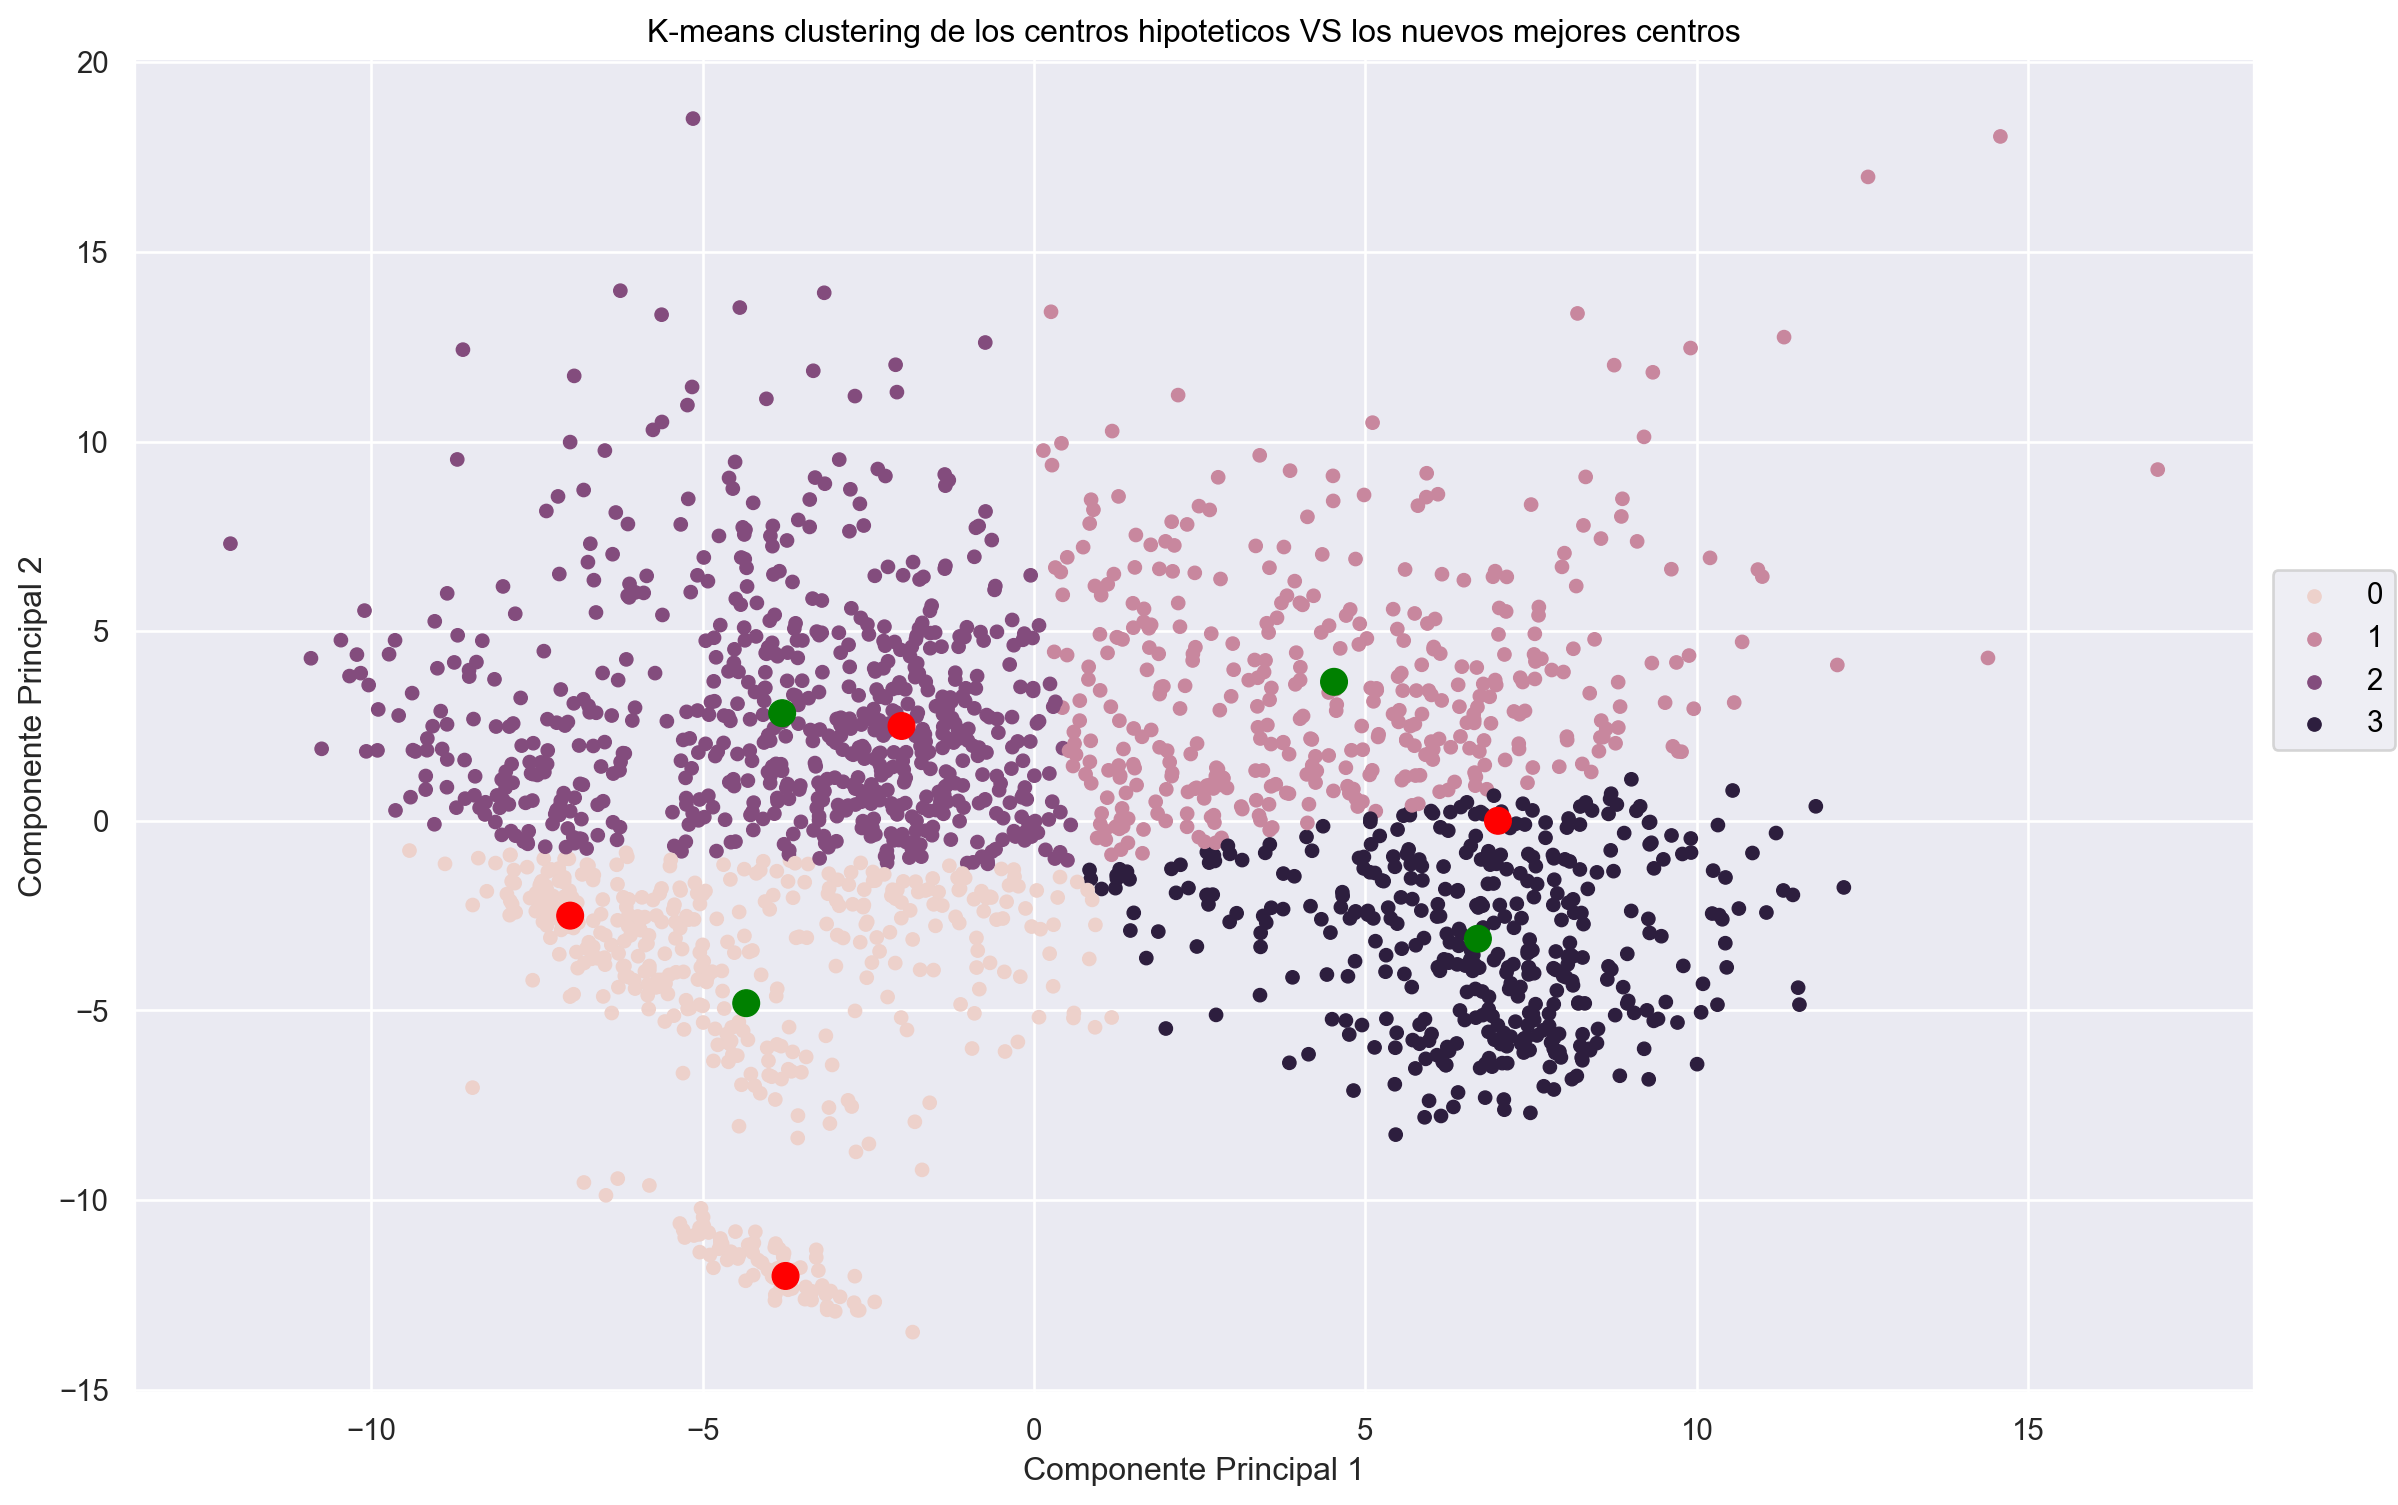

In [23]:
(
  so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
  .layout(size=(12,8))
  .add(so.Dot(pointsize=5), color = etiquetas)
  .add(so.Dot(color = "red", pointsize= 10), x = hipoteticos_centros[:,0], y = hipoteticos_centros[:,1])
  .add(so.Dot(color = "green", pointsize= 10), x = kmeans.cluster_centers_[:,0], y = kmeans.cluster_centers_[:,1])
  .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='K-means clustering de los centros hipoteticos VS los nuevos mejores centros'
    )
)

Si bien los centros elegidos a 'ojo' no estan muy acertados, tampoco estaban tan errados. Lo mismo sucedió para las etiquetas.

*(d) Repetir el agrupamiento utilizando DBSCAN.*

*- ¿Como eligirıan en este caso un valor de ε apropiado?*

Una forma vista en clase seria elegir un *'ε'* mas chico que la distancia que vemos entre clusters. Si bien no lo requiere la consiga, aprovechamos la otra recomendacion vista en clase y elegimos *'min_samples'* según la densidad de puntos (¿cuántos puntos tienen a distancia menor que *'ε'* los puntos del cluster?).

Como en este caso podemos ver un cluster claramente separado del otro 'gran' cluster, vamos a usar estos dos como nuestra referencia. Para este caso seria un valor de *'ε'* de 2 y para *'min_samples'* de 15.

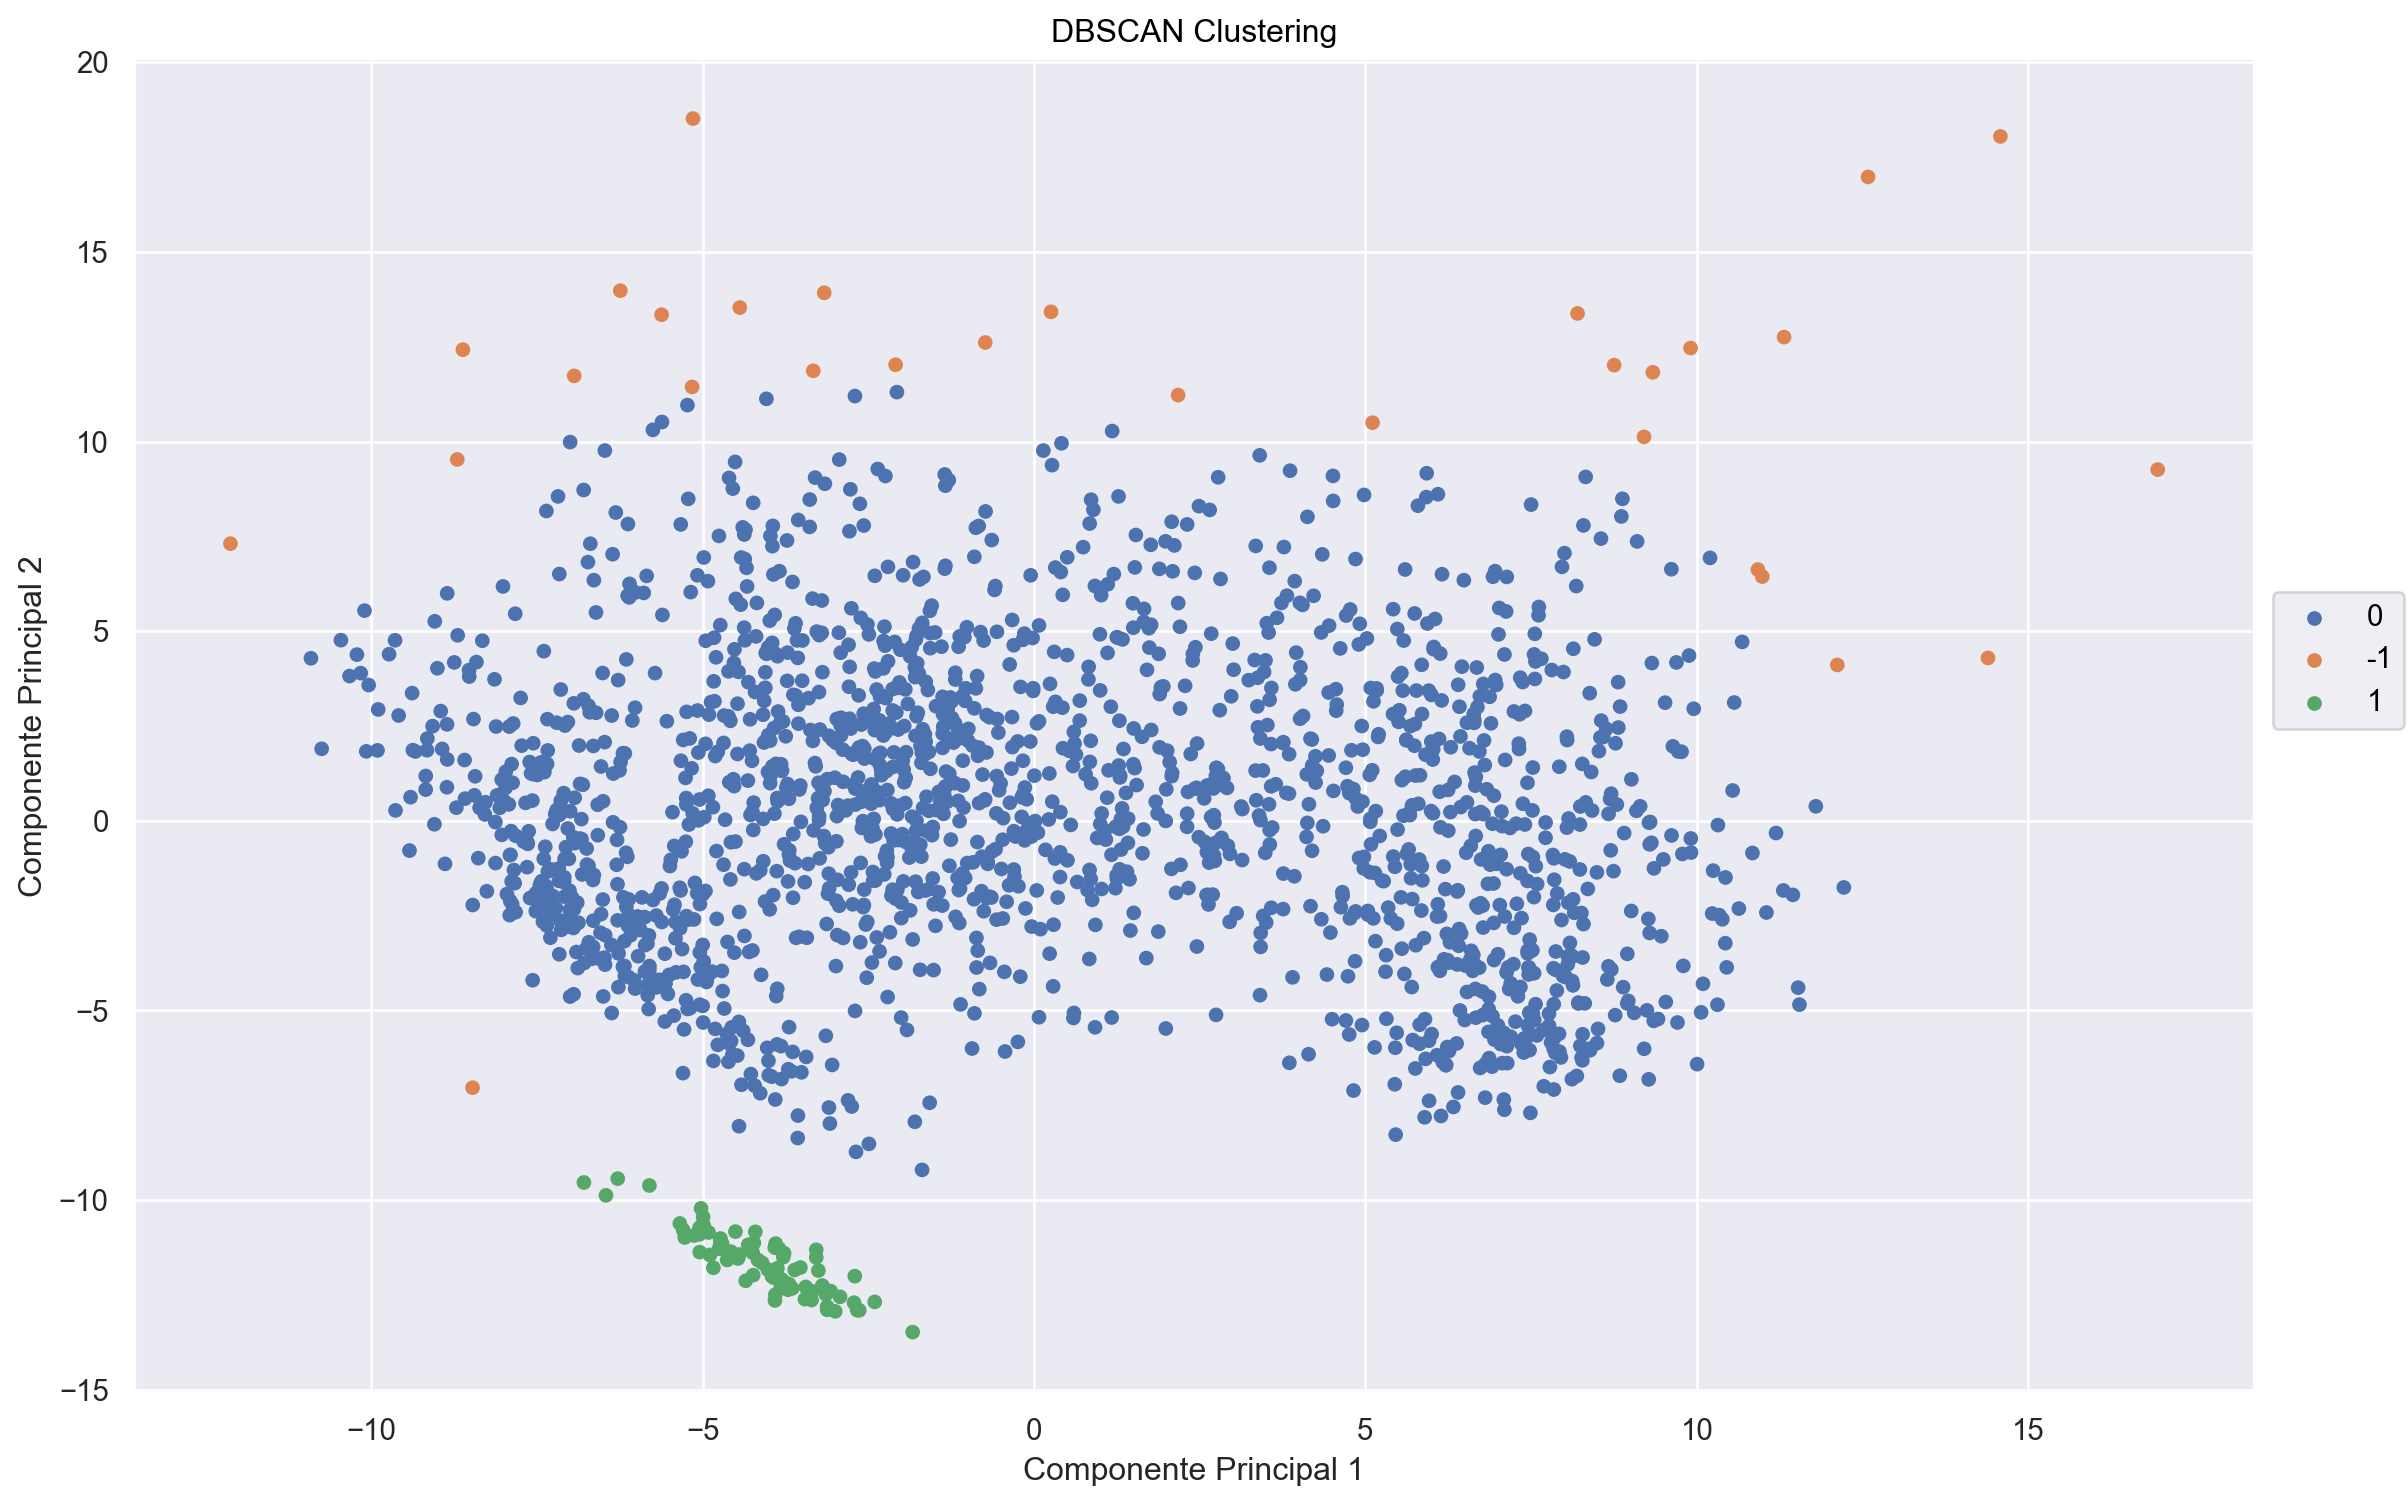

In [24]:
dbscan = DBSCAN(eps=2, min_samples=15)
etiquetas = dbscan.fit_predict(componentes_principales)

(
    so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
    .layout(size=(12,8))
    .add(so.Dot(pointsize=5), color = etiquetas.astype('str'))
    .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='DBSCAN Clustering'
    )
)

In [25]:
#Cantidad de clusters:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

Notemos que se formaron 2 clusters como esperabamos segun los valores elegidos para nuestros hiperparametros. Y por otro lado vale aclarar que el '-1' corresponde a los outliers.

En clase se introdujo el metodo de *'el codo'*, veamos su implementacion. La idea es seleccionar el valor de *'ε'* en donde se hace un codo el gráfico, de esta forma tenemos un valor chico que incluye a la mayoria de los datos.

In [26]:
neighbors = NearestNeighbors(n_neighbors=2)  # Esta función nos devuelve los más cercanos incluyendo a si mismo, por eso tomamos 2.
neighbors_fit = neighbors.fit(componentes_principales)

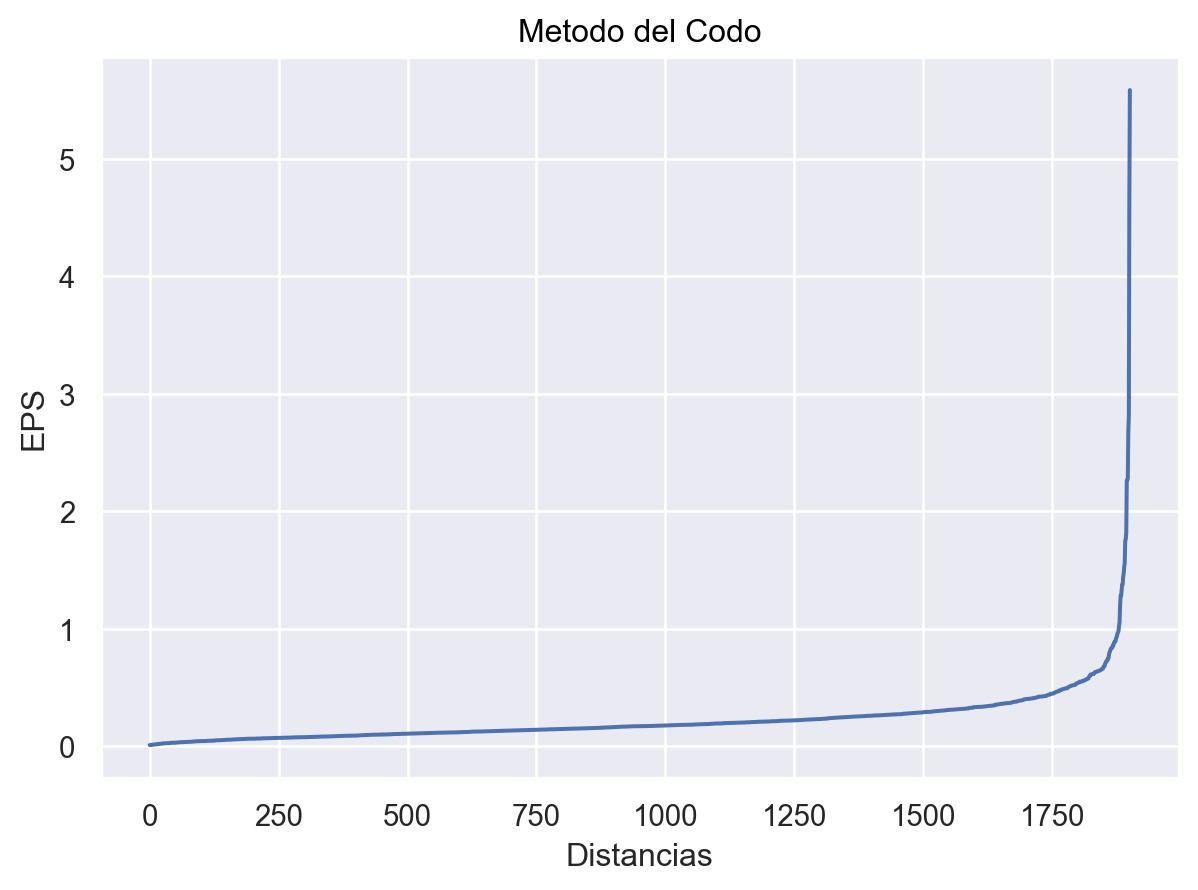

In [27]:
# Ordenamos de menor a mayor las distancias y graficamos
distancias, indices = neighbors_fit.kneighbors(componentes_principales)
distancias = distancias[:,1]
distancias = np.sort(distancias, axis=0)

# Visualizaicion del metodo
(
    so.Plot(x = np.arange(len(distancias)), y = distancias)
    .add(so.Line())
    .label(
    x='Distancias', y='EPS',
    title='Metodo del Codo'
    )
)

Bien, vamos a usar un valor cercano al 0,75 y mantengamos el elegido previamente para *'min_pts'*

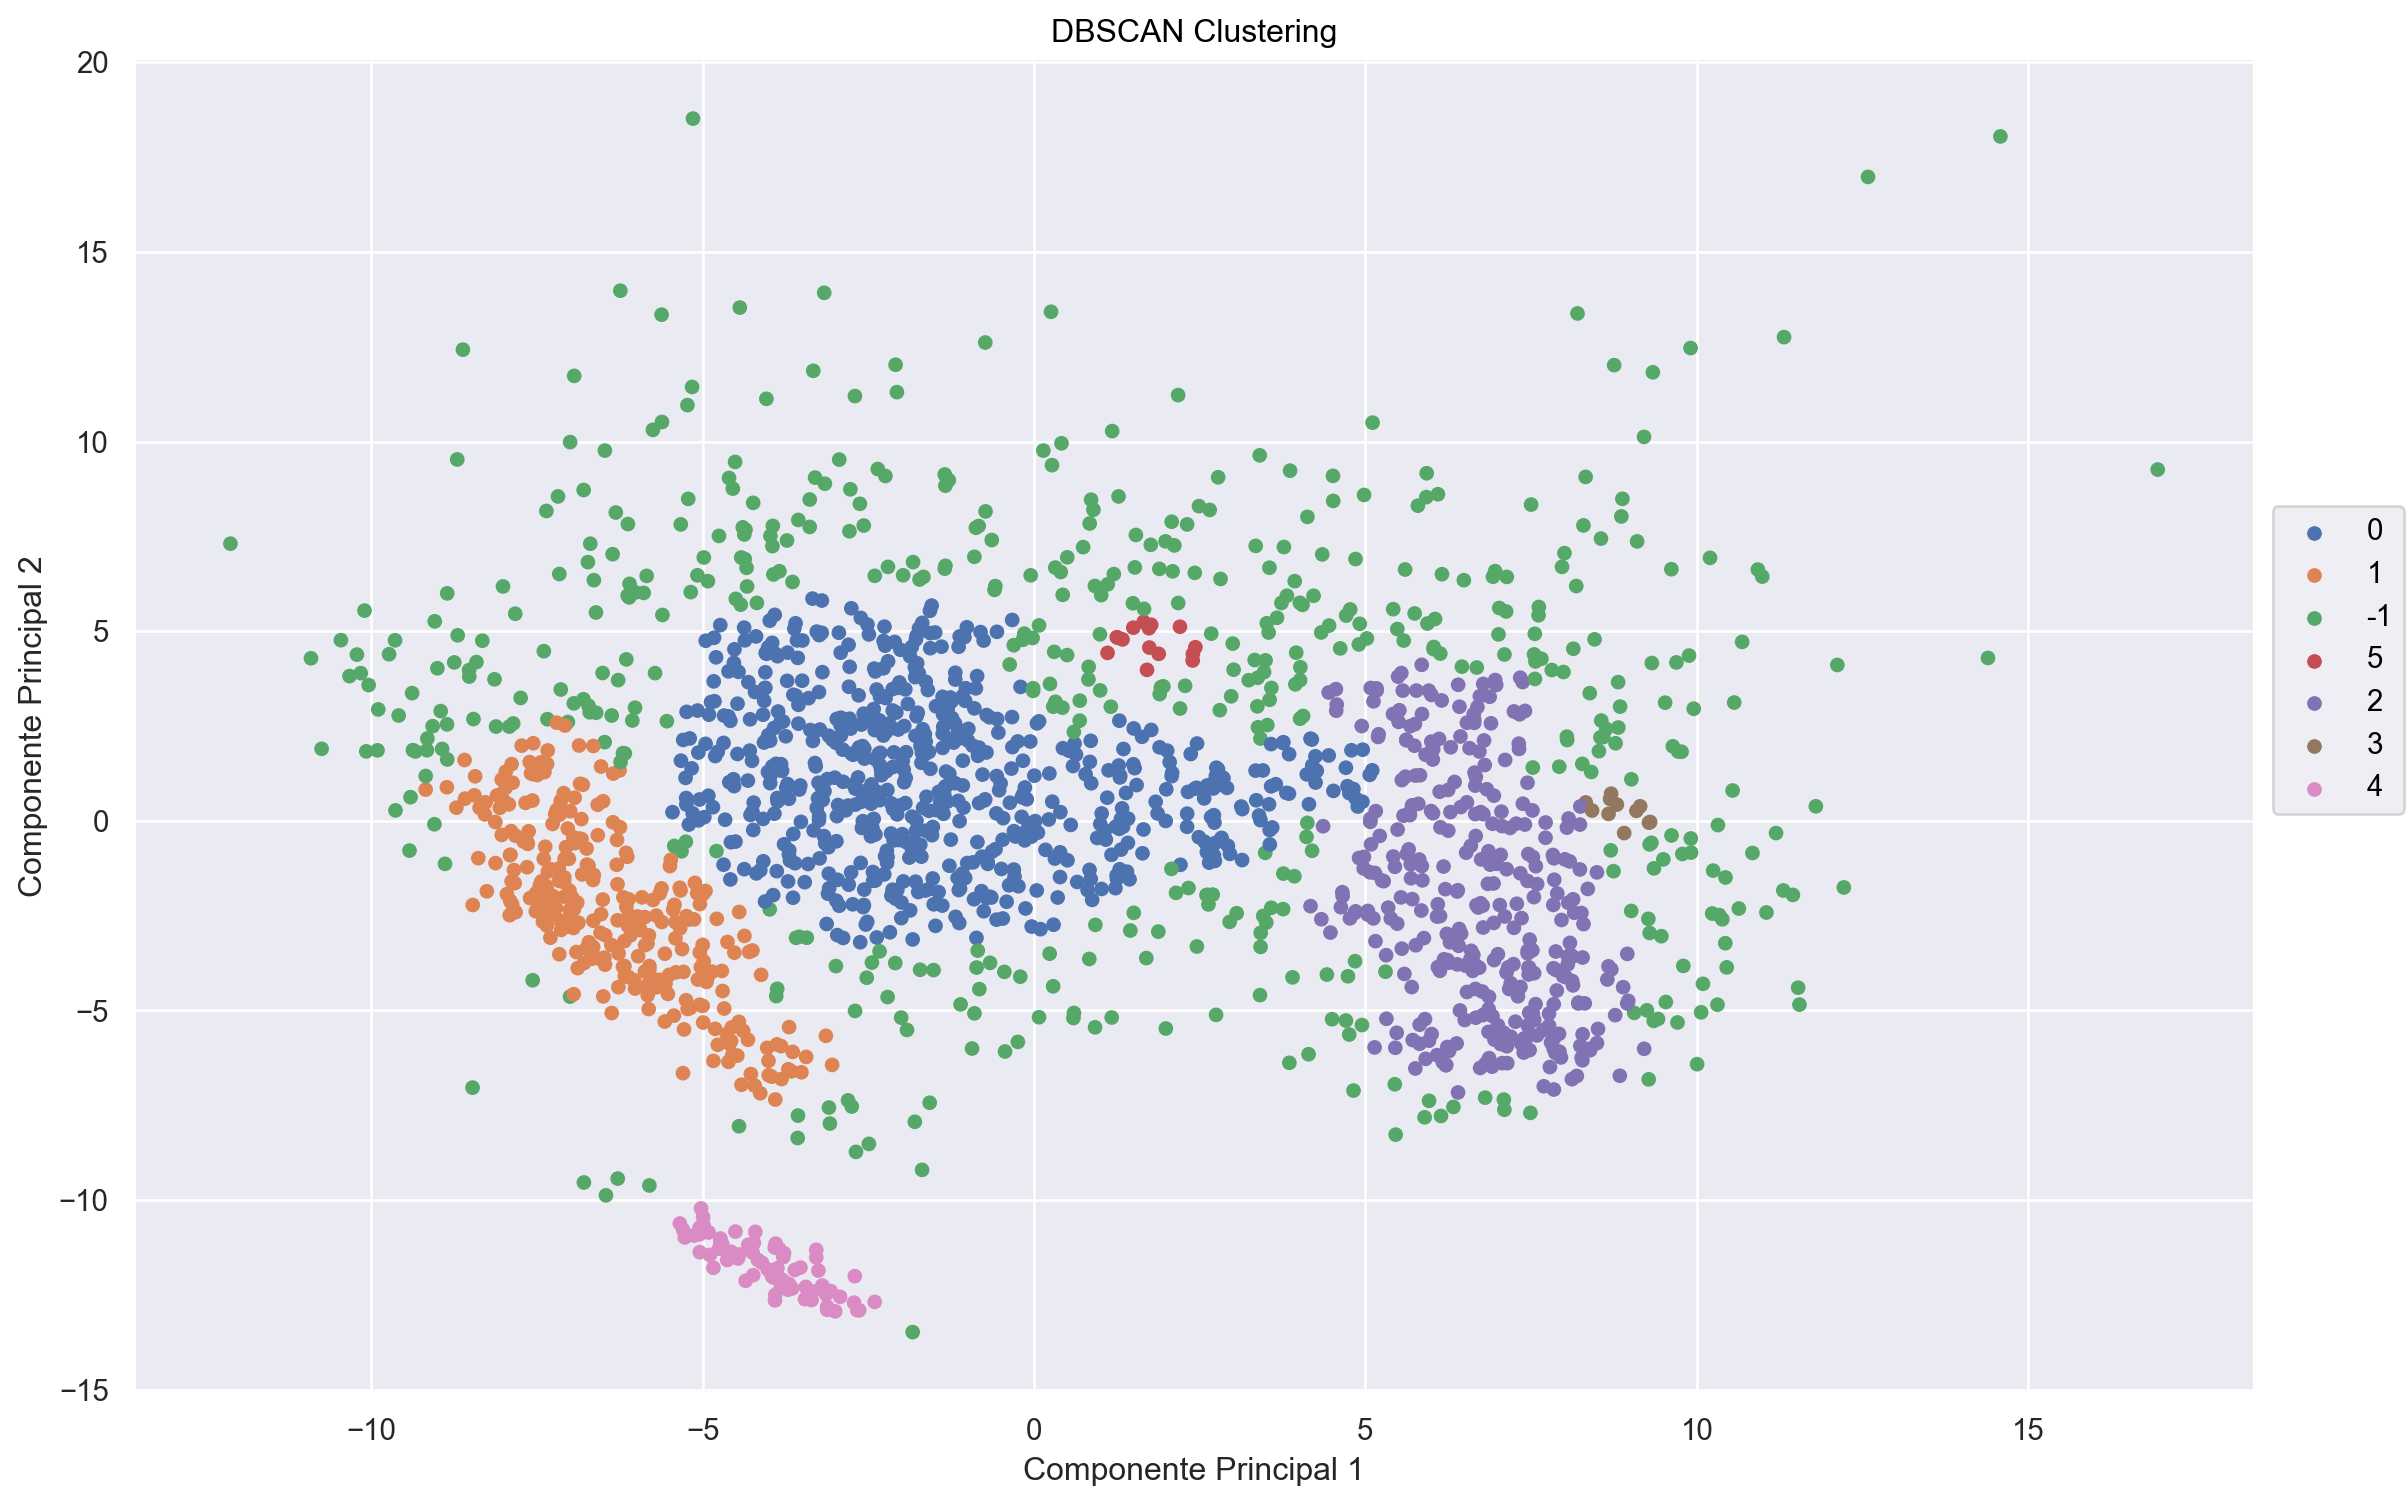

In [28]:
dbscan = DBSCAN(eps=0.75, min_samples=15)
etiquetas = dbscan.fit_predict(componentes_principales)

(
    so.Plot(x = componentes_principales[:,0], y = componentes_principales[:,1])
    .layout(size=(12,8))
    .add(so.Dot(pointsize=5), color = etiquetas.astype('str'))
    .label(
      x='Componente Principal 1', y='Componente Principal 2',
      title='DBSCAN Clustering'
    )
)

El ***Silhouette Score*** mide qué tan bien se agrupan los datos y qué tan distintos son los clusters entre sí. Un buen cluster tiene una alta cohesión interna y está bien separado de los otros clusters. El Silhouette Score se calcula para cada punto de datos y toma valores entre -1 y 1:

- +1: Indica que el punto está correctamente agrupado y lejos de los clusters vecinos.
- 0: Indica que el punto está en el borde o en el límite entre dos clusters.
- -1: Indica que el punto puede haber sido mal asignado a su cluster actual y debería pertenecer a otro cluster.

In [29]:
silhouette_score(componentes_principales, etiquetas)

0.0231445573856078

*(e) Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos componentes principales, modificando los valores de epsilon y minPts convenientemente.*

*- ¿Con cual de las dos opciones obtienen mejores resultados?*

Veamos que pasa si queremos usar los mismos valores utlizados previamente para *'eps'* y *'min_sample'*

In [30]:
dbscan = DBSCAN(eps=0.75, min_samples=15)
etiquetas = dbscan.fit_predict(data_scaled)
# silhouette_score(data_scaled, etiquetas)

In [31]:
# set(etiquetas)

Si descomentamos las 2 líneas superiores podemos ver que nuestra meticra de error nos da un *'ValueError'*, ya que al estar todos los puntos etiquetados como outlier no se pueden hacer tales calculos, volvamos a reucrrir al metodo del codo para encontrar para este nuevo dataset mucho mas complejo un valor de *'eps'* optimo como para arrancar y luego veamos como implementar una busqueda de hiperparametros optimos.

In [32]:
neighbors = NearestNeighbors(n_neighbors=2)  
neighbors_fit = neighbors.fit(data_scaled)

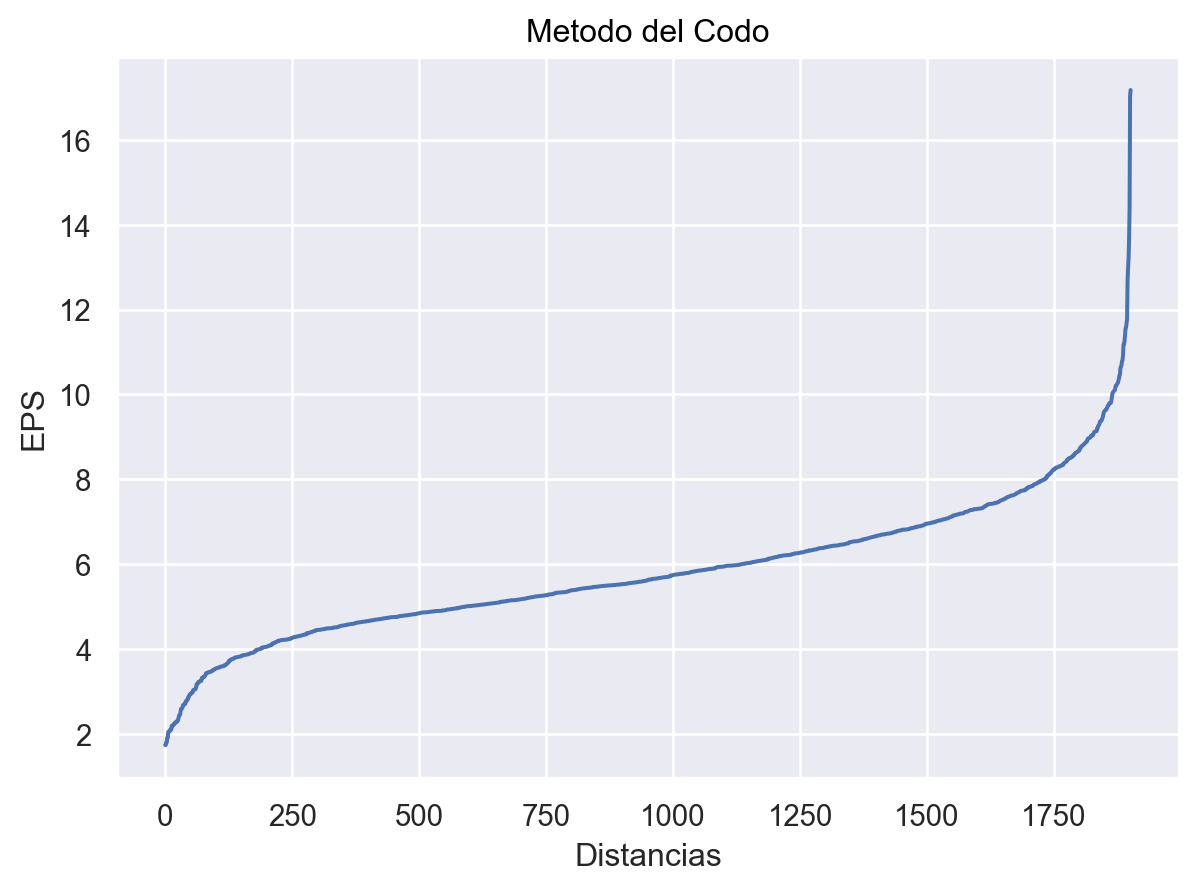

In [33]:
# Ordenamos de menor a mayor las distancias y graficamos
distances, indices = neighbors_fit.kneighbors(data_scaled)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

# Visualizaicion del metodo
(
    so.Plot(x = np.arange(len(distances)), y = distances)
    .add(so.Line())
    .label(
    x='Distancias', y='EPS',
    title='Metodo del Codo'
    )
)

Bien, ahora ya sabemos un poco mejor en que rango va a estar nuestro valor optimo de *'eps'*. No vamos a poder usar nuestra clasica clase de *'GridSearch'* de *'sklearn'* ya que esta esta pensada para problemas supervisados unicamente, veamos como, humildemente, implementar nuestra propia funcion con la metrica de error ya previamente explicada de '*silhoutte'*.

In [34]:
def GridSearch(combinaciones, data):

  resultados = pd.DataFrame(columns=['Hiperparámetros', 'Silhouette Score', 'Cantidad de Clusters', 'Porcentaje de Outliers'])

  for i in range(len(combinaciones)):
    etiquetas = DBSCAN(eps=combinaciones[i][0], min_samples=combinaciones[i][1]).fit_predict(data)
    cantidad_clusters = len(set(etiquetas))
    if cantidad_clusters > 1:
      shs = silhouette_score(data, etiquetas)
    else:
      shs = -1

    resultado = pd.DataFrame({
        'Hiperparámetros': [f'eps: {combinaciones[i][0]} y min_samples: {combinaciones[i][1]}'],
        'Silhouette Score': [shs],
        'Cantidad de Clusters': [cantidad_clusters],
        'Porcentaje de Outliers': [np.sum(etiquetas == -1)/len(etiquetas)]
    })

    resultados = pd.concat([resultados, resultado])

  return resultados

In [35]:
epsilon = np.linspace(4,20,num=10)
min_samples = np.arange(5,20,step=1)
combinaciones = list(itertools.product(epsilon, min_samples))

resultados = GridSearch(combinaciones, data_scaled)
resultados.sort_values(by='Silhouette Score', ascending=False).head(10)

C:\Users\Lucho\AppData\Local\Temp\ipykernel_7360\1746633200.py:20: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  resultados = pd.concat([resultados, resultado])


Hiperparámetros  Silhouette Score  \
0   eps: 16.444444444444443 y min_samples: 6          0.546286   
0  eps: 14.666666666666666 y min_samples: 18          0.546286   
0   eps: 14.666666666666666 y min_samples: 5          0.546286   
0   eps: 14.666666666666666 y min_samples: 6          0.546286   
0   eps: 14.666666666666666 y min_samples: 7          0.546286   
0   eps: 14.666666666666666 y min_samples: 8          0.546286   
0   eps: 14.666666666666666 y min_samples: 9          0.546286   
0  eps: 14.666666666666666 y min_samples: 10          0.546286   
0   eps: 16.444444444444443 y min_samples: 7          0.546286   
0  eps: 14.666666666666666 y min_samples: 12          0.546286   

  Cantidad de Clusters  Porcentaje de Outliers  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052  
0                    2                0.001052

Notemos como mejoro el modelo aproximadamente en un 0.54 con respecto al previamente visto en el punto anterior. Entonces, contestando la pregunta de la consigna, podriamos decir que con esta opcion estamos teniendo un modelos mas preciso.

## Clasificacion

*Ahora queremos poder predecir la posicion en la que juega cada jugador segun sus datos estadısticos utilizando KNN. En la columna Pos encontramos la posicion de los jugadores. Para la mayorıa de los jugadores se indica una unica posicion pero algunos jugadores tienen dos posiciones. Para simplificar el analisis vamos a considerar una unica posicion por jugador.*

*(a) Definir la variable Pos_filt que es la columna Pos, pero donde los jugadores deben tener una sola posicion (pueden quedarse solo con la primera posicion de cada jugador o eliminar los jugadores con dos posiciones, lo que consideren mas conveniente).*

In [36]:
# Cargar los datos
data = pd.read_csv('./FBRef2020-21.csv')

# Eliminar jugadores con menos de 500 minutos
data = data[data['Min'] >= 500]

# Eliminar columnas con más de 100 datos faltantes
data = data.dropna(thresh=len(data) - 100, axis=1)

# Eliminar filas con datos faltantes
data = data.dropna()

# Resetear los índices
data.reset_index(drop=True, inplace=True)

# Definir Pos_filt
data['Pos_filt'] = data['Pos'].apply(lambda x: x.split(',')[0] if ',' in x else x)

# Definir data_num con solo las variables numéricas a partir de Ast/90
data_num = data.loc[:, 'Ast/90':]

*(b) Construir el DataFrame data_clasif que resulta de agregarle la columna de Pos_filt al DataFrame data_num. Dividir data_num en un 80% para entrenamiento y un 20% para testeo.*

In [37]:
# Construir data_clasif
data_clasif = data_num.copy()
data_clasif['Pos_filt'] = data['Pos_filt']

# Dividir data_clasif en conjunto de entrenamiento y prueba
X = data_clasif.drop(columns=['Pos_filt'])
y = data_clasif['Pos_filt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


*(c) Aplicar un esquema de validacion en el conjunto de entrenamiento para seleccionar el valor optimo de K. (Esto puede demorar mucho si prueban muchos valores de K, pueden hacerlo hasta un valor maximo de K = 20.)*


In [38]:
# Probar diferentes valores de K
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Encontrar el mejor valor de K
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f"El valor óptimo de K es: {optimal_k}")


El valor óptimo de K es: 5


Nos quedamos con el valor 5 de nuestro K.

*(d) Para el valor de K obtenido, ¿cual es el porcentaje de aciertos en el conjunto de testeo?*

In [39]:
# Entrenamos el modelo con el valor óptimo de K
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

# Evaluamos el modelo en el conjunto de prueba
accuracy = knn.score(X_test, y_test)
print(f"El porcentaje de aciertos en el conjunto de prueba es: {accuracy * 100:.2f}%")


El porcentaje de aciertos en el conjunto de prueba es: 80.05%


*(e) Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. Indicar si se obtienen mejores resultados.*

In [40]:
from sklearn.decomposition import PCA

# Aplicamos PCA y quedarse con las dos primeras componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Dividimos los datos transformados
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Probarmos diferentes valores de K en los datos transformados
cv_scores_pca = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_pca, y_train_pca, cv=5, scoring='accuracy')
    cv_scores_pca.append(scores.mean())

# Encontramos el mejor valor de K
optimal_k_pca = k_values[cv_scores_pca.index(max(cv_scores_pca))]
print(f"El valor óptimo de K con PCA es: {optimal_k_pca}")

# Entrenamos el modelo con el valor óptimo de K en los datos transformados
knn_pca = KNeighborsClassifier(n_neighbors=optimal_k_pca)
knn_pca.fit(X_train_pca, y_train_pca)

# Evaluamos el modelo en el conjunto de prueba transformado
accuracy_pca = knn_pca.score(X_test_pca, y_test_pca)
print(f"El porcentaje de aciertos en el conjunto de prueba con PCA es: {accuracy_pca * 100:.2f}%")


El valor óptimo de K con PCA es: 13
El porcentaje de aciertos en el conjunto de prueba con PCA es: 73.23%


Podemos ver que el porcentaje de aciertos es mayor usando KKN con un 80.05% de aciertos contra el 73.23% de aciertos que tuvo el método PCA.

#### Ejercicio 8: Clasificación con el dataset de la liga inglesa femenina


Procedemos a la carga de datos y una visualización general de los mismos

In [41]:
# Cargar los datos
superleague_data = pd.read_csv('./superleague2023.csv')

In [42]:
superleague_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rk                      304 non-null    int64  
 1   Player                  304 non-null    object 
 2   Nation                  299 non-null    object 
 3   Pos                     304 non-null    object 
 4   Squad                   304 non-null    object 
 5   Age                     298 non-null    float64
 6   Born                    298 non-null    float64
 7   MP                      304 non-null    int64  
 8   Starts                  304 non-null    int64  
 9   Min                     304 non-null    object 
 10  90s                     304 non-null    float64
 11  Performance_Gls         304 non-null    int64  
 12  Performance_Ast         304 non-null    int64  
 13  Performance_G+A         304 non-null    int64  
 14  Performance_G-PK        304 non-null    in

In [43]:
superleague_data.describe()

Rk         Age         Born          MP      Starts         90s  \
count  304.00000  298.000000   298.000000  304.000000  304.000000  304.000000   
mean   152.50000   25.073826  1997.567114   13.105263    9.552632    9.545066   
std     87.90146    4.301114     4.328730    6.895886    7.207247    6.790683   
min      1.00000   15.000000  1987.000000    1.000000    0.000000    0.000000   
25%     76.75000   22.000000  1994.000000    7.000000    3.000000    3.650000   
50%    152.50000   25.000000  1998.000000   14.000000    8.500000    8.950000   
75%    228.25000   28.000000  2001.000000   20.000000   16.000000   15.600000   
max    304.00000   35.000000  2007.000000   22.000000   22.000000   22.000000   

       Performance_Gls  Performance_Ast  Performance_G+A  Performance_G-PK  \
count       304.000000       304.000000       304.000000        304.000000   
mean          1.378289         0.976974         2.355263          1.319079   
std           2.537830         1.458829         3.467735          2.462959   
min           0.000000         0.000000         0.000000          0.000000   
25%           0.000000         0.000000         0.000000          0.000000   
50%           0.000000         0.000000         1.000000          0.000000   
75%           2.000000         2.000000         3.000000          2.000000   
max          21.000000         8.000000        24.000000         21.000000   

       Performance_PK  Performance_PKatt  Performance_CrdY  Performance_CrdR  \
count      304.000000         304.000000        304.000000        304.000000   
mean         0.059211           0.075658          1.233553          0.039474   
std          0.329687           0.386487          1.537665          0.195040   
min          0.000000           0.000000          0.000000          0.000000   
25%          0.000000           0.000000          0.000000          0.000000   
50%          0.000000           0.000000          1.000000          0.000000   
75%          0.000000           0.000000          2.000000          0.000000   
max          3.000000           3.000000          8.000000          1.000000   

       Expected_xG  Expected_npxG  Expected_xAG  Expected_npxG+xAG  \
count   304.000000     304.000000    304.000000         304.000000   
mean      1.264803       1.202632      0.888158           2.091447   
std       1.954308       1.840611      1.213996           2.697547   
min       0.000000       0.000000      0.000000           0.000000   
25%       0.100000       0.100000      0.000000           0.200000   
50%       0.400000       0.400000      0.400000           1.100000   
75%       1.500000       1.425000      1.200000           2.800000   
max      12.300000      11.500000      7.400000          14.600000   

             PrgC        PrgP        PrgR  Per90Minutes_Gls  Per90Minutes_Ast  \
count  304.000000  304.000000  304.000000        304.000000        304.000000   
mean    12.375000   33.717105   33.309211          0.164112          0.108849   
std     15.445769   35.069835   43.673743          0.494171          0.242674   
min      0.000000    0.000000    0.000000          0.000000          0.000000   
25%      1.000000    5.750000    3.000000          0.000000          0.000000   
50%      7.000000   23.000000   16.000000          0.000000          0.000000   
75%     17.000000   53.000000   52.000000          0.170000          0.160000   
max     83.000000  176.000000  271.000000          6.430000          3.100000   

       Per90Minutes_G+A  Per90Minutes_G-PK  Per90Minutes_G+A-PK  \
count        304.000000         304.000000           304.000000   
mean           0.272664           0.160362             0.268947   
std            0.557449           0.493424             0.556490   
min            0.000000           0.000000             0.000000   
25%            0.000000           0.000000             0.000000   
50%            0.100000           0.000000             0.100000   
75%            0.330000       

In [44]:
superleague_data.head()

Rk              Player   Nation    Pos           Squad   Age    Born  MP  \
0   1  Princess Ademiluyi  eng ENG  MF,FW        West Ham  17.0  2006.0  11   
1   2   Michelle Agyemang  eng ENG     FW         Arsenal  17.0  2006.0   1   
2   3       Alyssa Aherne  eng ENG     MF         Everton  19.0  2004.0   1   
3   4        Olga Ahtinen   fi FIN     MF       Tottenham   NaN     NaN  16   
4   5          Asmita Ale  eng ENG     DF  Leicester City  21.0  2001.0   6   

   Starts  Min   90s  Performance_Gls  Performance_Ast  Performance_G+A  \
0       0   87   1.0                0                1                1   
1       0    6   0.1                0                0                0   
2       0    1   0.0                0                0                0   
3      10  923  10.3                1                2                3   
4       4  296   3.3                0                0                0   

   Performance_G-PK  Performance_PK  Performance_PKatt  Performance_CrdY  \
0                 0               0                  0                 0   
1                 0               0                  0                 0   
2                 0               0                  0                 0   
3                 1               0                  0                 4   
4                 0               0                  0                 1   

   Performance_CrdR  Expected_xG  Expected_npxG  Expected_xAG  \
0                 0          0.0            0.0           0.0   
1                 0          0.0            0.0           0.0   
2                 0          0.0            0.0           0.0   
3                 0          0.4            0.4           1.2   
4                 0          0.2            0.2           0.0   

   Expected_npxG+xAG  PrgC  PrgP  PrgR  Per90Minutes_Gls  Per90Minutes_Ast  \
0                0.0     2     2    11               0.0              1.03   
1                0.0     0     0     0               0.0              0.00   
2                0.0     0     0     0               0.0              0.00   
3                1.6    11    71    12               0.1              0.20   
4                0.2     3    13     5               0.0              0.00   

   Per90Minutes_G+A  Per90Minutes_G-PK  Per90Minutes_G+A-PK  Per90Minutes_xG  \
0              1.03                0.0                 1.03             0.03   
1              0.00                0.0                 0.00             0.00   
2              0.00                0.0                 0.00             0.00   
3              0.29                0.1                 0.29             0.04   
4              0.00                0.0                 0.00             0.06   

   Per90Minutes_xAG  Per90Minutes_xG+xAG  Per90Minutes_npxG  \
0              0.00                 0.03               0.03   
1              0.00                 0.00               0.00   
2              0.00                 0.00               0.00   
3              0.12                 0.15               0.04   
4              0.00                 0.06               0.06   

   Per90Minutes_npxG+xAG   
0                    0.03  
1                    0.00  
2                    0.00  
3                    0.15  
4                    0.06

Definimos la columna *Pos_filt*, quedandonos con la primer posicion de cada jugador.

También vamos a necesitar hacer el dataframe de datos numéricos, pero nuestro set de datos tiene strings de números con coma (en vez de puntos para decimales), así que realizaremos una intervención en los mismos para poder posteriormente hacer un correcto tipado de los datos.

In [45]:
# Replace '#DIV/0!' with NaN
superleague_data.replace('#DIV/0!', np.nan, inplace=True)

# Option 1: Drop rows with NaN values
superleague_data.dropna(inplace=True)
# Definimos Pos_filt
superleague_data['Pos_filt'] = superleague_data['Pos'].apply(lambda x: x.split(',')[0] if ',' in x else x)

# Reemplazamos comas por puntos en todo el DataFrame
superleague_data = superleague_data.replace(',', '.', regex=True)

# Definimos data_num con solo las variables numéricas a partir de MP
data_num_superleague = superleague_data.loc[:, 'MP':]

# Construimos data_clasif
data_clasif_superleague = data_num_superleague.copy()
data_clasif_superleague['Pos_filt'] = superleague_data['Pos_filt']


Procedemos a dividir data_clasif en conjunto de entrenamiento y prueba

In [46]:
X_superleague = data_clasif_superleague.drop(columns=['Pos_filt'])
y_superleague = data_clasif_superleague['Pos_filt']

X_train_superleague, X_test_superleague, y_train_superleague, y_test_superleague = train_test_split(
    X_superleague, y_superleague, test_size=0.2, random_state=42
)

Teniendo ya nuestros conjuntos, vamos a buscar los valores de K y extraer el mejor.

In [47]:
# Probamos diferentes valores de K
cv_scores_superleague = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_superleague, y_train_superleague, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
    cv_scores_superleague.append(scores.mean())

# Encontramos el mejor valor de K
optimal_k_superleague = k_values[cv_scores_superleague.index(max(cv_scores_superleague))]
print(f"El valor óptimo de K para la Superleague es: {optimal_k_superleague}")


El valor óptimo de K para la Superleague es: 5


Continuamos entrenando el modelo con el valor óptimo de K

In [48]:
knn_superleague = KNeighborsClassifier(n_neighbors=optimal_k_superleague)
knn_superleague.fit(X_train_superleague, y_train_superleague)

# Evaluamos el modelo en el conjunto de prueba
accuracy_superleague = knn_superleague.score(X_test_superleague, y_test_superleague)
print(f"El porcentaje de aciertos en el conjunto de prueba de la Superleague es: {accuracy_superleague * 100:.2f}%")


El porcentaje de aciertos en el conjunto de prueba de la Superleague es: 58.33%


### Recomendaciones de jugadores

#### Trabajamos ahora con el dataset transfermarkt_fbref_201920.csv que incluye la valuacion de los jugadores

Procedemos a la carga de datos y una visualización general de los mismos

In [49]:
# Cargar los datos
datos_transfermarkt = pd.read_csv('./transfermarkt_fbref_201920.csv', delimiter=';')

In [50]:
datos_transfermarkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Columns: 400 entries, Column1 to Season
dtypes: float64(239), int64(152), object(9)
memory usage: 8.1+ MB


In [51]:
datos_transfermarkt.describe()

Column1          age   birth_year         value       height  \
count  2644.000000  2644.000000  2644.000000  2.644000e+03  2644.000000   
mean   1363.432678    25.316944  1991.043116  9.570623e+06   181.593797   
std     789.855596     4.518445    67.264099  1.490187e+07    12.956865   
min       0.000000     0.000000     0.000000  5.000000e+01     0.000000   
25%     680.750000    22.000000  1990.000000  1.000000e+06   178.000000   
50%    1362.500000    25.000000  1993.000000  4.000000e+06   183.000000   
75%    2047.250000    28.000000  1997.000000  1.200000e+07   187.000000   
max    2731.000000    41.000000  2004.000000  1.800000e+08   202.000000   

             games  games_starts      minutes        goals      assists  \
count  2644.000000   2644.000000  2644.000000  2644.000000  2644.000000   
mean     18.476172     14.329803  1285.914523     1.769289     1.231089   
std      10.939719     10.927727   947.346883     3.338358     2.011300   
min       1.000000      0.000000     1.000000     0.000000     0.000000   
25%       9.000000      4.000000   424.500000     0.000000     0.000000   
50%      19.000000     13.000000  1181.500000     0.000000     0.000000   
75%      28.000000     23.000000  2050.250000     2.000000     2.000000   
max      38.000000     38.000000  3420.000000    36.000000    21.000000   

         pens_made     pens_att  cards_yellow    cards_red  goals_per90  \
count  2644.000000  2644.000000   2644.000000  2644.000000  2644.000000   
mean      0.178517     0.223147      2.811271     0.132753     0.119081   
std       0.812255     0.930897      2.866748     0.369272     0.315072   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.000000     0.000000      0.000000     0.000000     0.000000   
50%       0.000000     0.000000      2.000000     0.000000     0.000000   
75%       0.000000     0.000000      4.000000     0.000000     0.150000   
max      14.000000    15.000000     17.000000     2.000000    10.000000   

       assists_per90  goals_assists_per90  goals_pens_per90  \
count    2644.000000          2644.000000       2644.000000   
mean        0.078873             0.197973          0.108570   
std         0.138888             0.363714          0.300085   
min         0.000000             0.000000          0.000000   
25%         0.000000             0.000000          0.000000   
50%         0.000000             0.100000          0.000000   
75%         0.110000             0.290000          0.140000   
max         1.760000            10.000000         10.000000   

       goals_assists_pens_per90           xg         npxg           xa  \
count               2644.000000  2644.000000  2644.000000  2644.000000   
mean                   0.187458     1.748374     1.577534     1.164486   
std                    0.349281     2.893508     2.487318     1.632355   
min                    0.000000     0.000000     0.000000     0.000000   
25%                    0.000000     0.100000     0.100000     0.100000   
50%                    0.090000     0.700000     0.700000     0.500000   
75%                    0.270000     2.000000     1.900000     1.600000   
max                   10.000000    27.500000    23.700000    18.400000   

          xg_per90     xa_per90  xg_xa_per90   npxg_per90  npxg_xa_per90  \
count  2644.000000  2644.000000  2644.000000  2644.000000    2644.000000   
mean      0.128903     0.079599     0.208453     0.118370       0.198007   
std       0.203654     0.104486     0.249698     0.185097       0.232686   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.020000     0.010000     0.050000     0.020000       0.050000   
50%       0.060000     0.050000     0.130000     0.060000       0.120000   
75%       0.170000     0.110000     0.300000     0.160000       0.290000   
max       4.470000     2.100000     4.470000     4.470000       4.470000   

       minutes_90s  shots_total  shots_on_target  shots_free_ki

In [52]:
datos_transfermarkt.head()

Column1                 player nationality position   squad  age  \
0       21  Martin Aguirregabiria      es ESP       DF  Alavés   23   
1      390           Oliver Burke     sco SCO    MF,FW  Alavés   22   
2      430       Ví­ctor Camarasa      es ESP       MF  Alavés   25   
3      737           Rubén Duarte      es ESP       DF  Alavés   23   
4      770            Rodrigo Ely      br BRA       DF  Alavés   25   

   birth_year    value  height                      position2   foot   league  \
0        1996  4000000     178          Defender - Right-Back  right  La Liga   
1        1997  4000000     188         Forward - Right Winger  right  La Liga   
2        1994  4000000     183  Midfielder - Central Midfield  right  La Liga   
3        1995  4000000     172           Defender - Left-Back   left  La Liga   
4        1993  1000000     188         Defender - Centre-Back  right  La Liga   

   games  games_starts  minutes  goals  assists  pens_made  pens_att  \
0     31            23     2099      1        1          0         0   
1     31            14     1429      1        2          0         0   
2     17            15     1293      0        1          0         0   
3     31            30     2663      0        1          0         0   
4     25            24     2121      2        0          0         0   

   cards_yellow  cards_red  goals_per90  assists_per90  goals_assists_per90  \
0             5          1         0.04           0.04                 0.09   
1             2          0         0.06           0.13                 0.19   
2             1          0         0.00           0.07                 0.07   
3            11          0         0.00           0.03                 0.03   
4             9          1         0.08           0.00                 0.08   

   goals_pens_per90  goals_assists_pens_per90   xg  npxg   xa  xg_per90  \
0              0.04                      0.09  0.9   0.9  1.0      0.04   
1              0.06                      0.19  3.2   3.2  1.2      0.20   
2              0.00                      0.07  0.3   0.3  1.6      0.02   
3              0.00                      0.03  1.3   1.3  0.9      0.04   
4              0.08                      0.08  0.7   0.7  0.1      0.03   

   xa_per90  xg_xa_per90  npxg_per90  npxg_xa_per90  minutes_90s  shots_total  \
0      0.04         0.08        0.04           0.08         23.3            3   
1      0.07         0.27        0.20           0.27         15.9           20   
2      0.11         0.13        0.02           0.13         14.4            8   
3      0.03         0.08        0.04           0.08         29.6           20   
4      0.00         0.03        0.03           0.03         23.6            6   

   shots_on_target  shots_free_kicks  shots_on_target_pct  shots_total_per90  \
0                1                 0                 33.3               0.13   
1                9                 0                 45.0               1.26   
2                2                 0                 25.0               0.56   
3                8                 0                 40.0               0.68   
4                3                 0                 50.0               0.25   

   shots_on_target_per90  goals_per_shot  goals_per_shot_on_target  \
0                   0.04            0.33                      1.00   
1                   0.57            0.05                      0.11   
2                   0.14            0.00                      0.00   
3                   0.27            0.00                      0.00   
4                   0.13            0.33                      0.67   

   npxg_per_shot  xg_net  npxg_net  passes_completed  passes  passes_pct  \
0           0.30     0.1       0.1               722    1014        71.2   
1           0.16    -2.2      -2.2               226     333        67.9   
2           0.04    -0.3      -0.3               430     533        80.7   
3           0.06    -1.3      -1.3   

*En 2021 Messi fue transferido del Barcelona al PSG. Basandose en los datos disponibles, recomendarle a Barcelona un jugador de caracterısticas similares a Messi pero de menor valor.*

Para esto, procedemos a filtrar los datos de Messi y quedarnos con las características más relevantes de él. Luego vamos a buscar quien tenga los valores más cercanos a Messi.

In [53]:
# Filtramos datos de Messi
datos_messi = datos_transfermarkt[datos_transfermarkt['player'] == 'Lionel Messi']

# Definimos las características relevantes
caracteristicas = ['goals', 'assists', 'dribbles', 'shots_total']  # Puedes ajustar las características según los datos disponibles

# Filtramos las características de Messi
caracteristicas_messi = datos_messi[caracteristicas].values

# Calculamos la distancia a todos los jugadores
datos_transfermarkt['distancia'] = datos_transfermarkt[caracteristicas].apply(lambda row: np.linalg.norm(row.values - caracteristicas_messi), axis=1)

# Ordenamos por distancia y recomendamos el jugador más cercano pero de menor valor
recommendation = datos_transfermarkt[datos_transfermarkt['value'] < datos_messi['value'].values[0]].sort_values(by='distancia').iloc[0]
print(f"Recomendación: {recommendation['player']}, Valor: {recommendation['value']}")


Recomendación: Wilfried Zaha, Valor: 44000000


Concluimos con Wilfried Zaha, con el valor de 44000000

*b. Queremos elaborar un modelo para detectar jugadores “baratos”, es decir cuya valuacion en el mercado (columna value) sea inferior a que la que nosotros estimemos. Para esto, quisieramos ajustar el valor de mercado a partir de los datos de los jugadores (para estimar la valuacion pueden incorporar la edad entre las variables explicativas). El modelo que desarrollen puede basarse en redes neuronales o en otro modelo que consideren adecuado.*

Las caracterísitcas que vamos a tomar son: Edad, Goles, Asistencias, Regates y Tiros totales, respecto a su valor

In [54]:
# Definimos las características y el objetivo
X_transfermarkt = datos_transfermarkt[['age', 'goals', 'assists', 'dribbles', 'shots_total']]
y_transfermarkt = datos_transfermarkt['value']

# Dividimos los datos en entrenamiento y prueba
X_train_transfermarkt, X_test_transfermarkt, y_train_transfermarkt, y_test_transfermarkt = train_test_split(X_transfermarkt, y_transfermarkt, test_size=0.2, random_state=42)

# Entrenamos el modelo
model = LinearRegression()
model.fit(X_train_transfermarkt, y_train_transfermarkt)

# Evaluamos el modelo
y_pred_transfermarkt = model.predict(X_test_transfermarkt)
print(f"R2 score: {model.score(X_test_transfermarkt, y_test_transfermarkt)}")
    

R2 score: 0.4069484103084531


*Segun el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quien es el mas sobrevalorado? Es decir, el jugador con mayor diferencia entre el valor de mercado y el valor predicho por el modelo. ¿Y el mas infravalorado?*


In [55]:
# Calculamos la diferencia entre el valor real y el valor predicho
datos_transfermarkt['valor_prediccion'] = model.predict(X_transfermarkt)
datos_transfermarkt['diferencia'] = datos_transfermarkt['value'] - datos_transfermarkt['valor_prediccion']

# Jugador más sobrevalorado
most_overvalued = datos_transfermarkt[datos_transfermarkt['value'] > 100000].sort_values(by='diferencia', ascending=False).iloc[0]
print(f"El jugador más sobrevalorado es: {most_overvalued['player']}, Diferencia: {most_overvalued['diferencia']}")

# Jugador más infravalorado
most_undervalued = datos_transfermarkt[datos_transfermarkt['value'] > 100000].sort_values(by='diferencia').iloc[0]
print(f"El jugador más infravalorado es: {most_undervalued['player']}, Diferencia: {most_undervalued['diferencia']}")


El jugador más sobrevalorado es: Kylian Mbappé, Diferencia: 136986620.9237368
El jugador más infravalorado es: Francesco Caputo, Diferencia: -34480493.7772782


*El PSG quiere vender a Mbappe y reemplazarlo por otro jugador mas barato. Hacer un listado de los 10 jugadores mas parecidos a Mbappe segun el criterio que elijan. De esos 10 jugadores, segun el modelo que desarrollaron en el ıtem anterior, ¿a que jugador recomendarıan teniendo en cuenta la valuacion del mercado y la prediccion del modelo? Para ese jugador, averiguar la valuacion actual del jugador. ¿Hicieron una buena recomendacion?*

In [56]:
# Filtramos datos de Mbappé
mbappe_data = datos_transfermarkt[datos_transfermarkt['player'] == 'Kylian Mbappé']

# Calculamos la distancia a todos los jugadores
datos_transfermarkt['distance_mbappe'] = datos_transfermarkt[caracteristicas].apply(lambda row: np.linalg.norm(row.values - mbappe_data[caracteristicas].values), axis=1)

# Generamos un listado de los 10 jugadores más parecidos a Mbappé
top_10_similar = datos_transfermarkt.sort_values(by='distance_mbappe').head(10)
top_10_similar


Column1           player nationality position           squad  age  \
1858     1602    Kylian Mbappé      fr FRA       FW       Paris S-G   20   
147      1149     Josip Ilicic      si SVN       FW        Atalanta   31   
801      2102      Richarlison      br BRA       FW         Everton   22   
2340     1095    Son Heung-min      kr KOR    FW,MF       Tottenham   27   
1321     1527       Sadio Mané      sn SEN       FW       Liverpool   27   
279       960     Serge Gnabry      de GER    FW,MF   Bayern Munich   24   
1450     1559  Anthony Martial      fr FRA       FW  Manchester Utd   23   
2504     1704    Gerard Moreno      es ESP    FW,MF      Villarreal   27   
1080      753     Paulo Dybala      ar ARG    FW,MF        Juventus   25   
2061      336    Denis Bouanga      ga GAB    FW,DF   Saint-Étienne   24   

      birth_year      value  height                 position2   foot  \
1858        1998  180000000     178     Forward - Left Winger  right   
147         1988   15000000     190  Forward - Second Striker   left   
801         1997   60000000     184  Forward - Centre-Forward  right   
2340        1992   75000000     184     Forward - Left Winger   both   
1321        1992  120000000     174     Forward - Left Winger  right   
279         1995   72000000     176    Forward - Right Winger  right   
1450        1995   48000000     181  Forward - Centre-Forward  right   
2504        1992   16000000     180  Forward - Centre-Forward   left   
1080        1993   72000000     177  Forward - Second Striker   left   
2061        1994    8000000     180     Forward - Left Winger  right   

              league  games  games_starts  minutes  goals  assists  pens_made  \
1858         Ligue 1     20            17     1513     18        5          0   
147          Serie A     26            21     1663     15        5          0   
801   Premier League     36            36     3070     13        3          0   
2340  Premier League     30            28     2476     11       10          0   
1321  Premier League     35            31     2747     18        7          0   
279       Bundesliga     31            26     2193     12       10          0   
1450  Premier League     32            31     2624     17        6          0   
2504         La Liga     35            33     2744     18        5          1   
1080         Serie A     33            25     2155     11        6          1   
2061         Ligue 1     26            23     2042     10        3          3   

      pens_att  cards_yellow  cards_red  goals_per90  assists_per90  \
1858         0             0          0         1.07           0.30   
147          0             1          1         0.81           0.27   
801          0             8          0         0.38           0.09   
2340         1             0          2         0.40           0.36   
1321         0             3          0         0.59           0.23   
279          0             0          0         0.49           0.41   
1450         1             1          0         0.58           0.21   
2504         2             5          0         0.59           0.16   
1080         1             5          0         0.46           0.25   
2061         3             4          0         0.44           0.13   

      goals_assists_per90  goals_pens_per90  goals_assists_pens_per90    xg  \
1858                 1.37              1.07                      1.37  17.1   
147                  1.08              0.81                      1.08   9.2   
801                  0.47              0.38                      0.47   9.1   
2340                 0.76              0.40                      0.76   8.9   
1321                 0.82              0.59                      0.82  13.8   
279                  0.90              0.49                      0.90  12.7   
1450                 0.79              0.58                      0.79  10.9   
2504                 0.75              0.56                      0.72 

In [57]:
# Recomendamos jugador teniendo en cuenta la valuación
recommended_player = top_10_similar.sort_values(by='valor_prediccion').iloc[0]
print(f"Recomendación para reemplazar a Mbappé: {recommended_player['player']}, Valor: {recommended_player['value']}")

Recomendación para reemplazar a Mbappé: Denis Bouanga, Valor: 8000000


Concluimos así con una recomendación de Denis Bouanga, con el valor de 8000000 al reemplazo de Mbappé.